In [28]:
import pandas as pd 
import numpy as np
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib as mpl

In [29]:
List = pd.read_excel(open('Data projet.xlsx', 'rb'), sheet_name='List') 
ebita = pd.read_excel(open('Data projet.xlsx', 'rb'), sheet_name='EBITA MARGIN')
returns = pd.read_excel(open('Data projet.xlsx', 'rb'), sheet_name='Returns')
ev = pd.read_excel(open('Data projet.xlsx', 'rb'), sheet_name='EV')
roic = pd.read_excel(open('Data projet.xlsx', 'rb'), sheet_name='ROIC')
wacc = pd.read_excel(open('Data projet.xlsx', 'rb'), sheet_name='WACC')
esg = pd.read_excel(open('Data projet.xlsx', 'rb'), sheet_name='ESG Score from Bloomberg')

In [30]:
#1/7 (à n'exécuter qu'une fois)
List = List.drop(List.columns[[0,1]], axis = 1)
List = List.drop(index = [0,1,2])
List.columns = List.iloc[0]
List = List[1:] 
List.columns.values[0] = "Equity"
List

3             Equity                          NAME         INDUSTRY_SECTOR  \
4      BP/ LN Equity                        BP PLC                  Energy   
5    STERV FH Equity          STORA ENSO OYJ-R SHS         Basic Materials   
6       IP US Equity        INTERNATIONAL PAPER CO         Basic Materials   
7      UPM FH Equity               UPM-KYMMENE OYJ         Basic Materials   
8      NEM US Equity                  NEWMONT CORP         Basic Materials   
9      XOM US Equity              EXXON MOBIL CORP                  Energy   
10     VLO US Equity            VALERO ENERGY CORP                  Energy   
11     NUE US Equity                    NUCOR CORP         Basic Materials   
12     ABX CT Equity             BARRICK GOLD CORP         Basic Materials   
13     FMC US Equity                      FMC CORP         Basic Materials   
14     FCX US Equity          FREEPORT-MCMORAN INC         Basic Materials   
15     TTE FP Equity              TOTALENERGIES SE                  Energy   
16     COP US Equity                CONOCOPHILLIPS                  Energy   
17     ADM US Equity     ARCHER-DANIELS-MIDLAND CO  Consumer, Non-cyclical   
18     PKX US Equity  POSCO HOLDINGS INC -SPON ADR         Basic Materials   
19     BHP US Equity        BHP GROUP LTD-SPON ADR         Basic Materials   
20  TECK/B CT Equity      TECK RESOURCES LTD-CLS B         Basic Materials   
21     RIO US Equity        RIO TINTO PLC-SPON ADR         Basic Materials   
22     WIL SP Equity      WILMAR INTERNATIONAL LTD  Consumer, Non-cyclical   
23    MNDI LN Equity                     MONDI PLC         Basic Materials   
24     AAL LN Equity            ANGLO AMERICAN PLC         Basic Materials   
25     CVE CT Equity            CENOVUS ENERGY INC                  Energy   
26     ALA CT Equity                   ALTAGAS LTD               Utilities   
27     WLK US Equity                 WESTLAKE CORP         Basic Materials   
28    GLEN LN Equity                  GLENCORE PLC         Basic Materials   
29     MOS US Equity                 MOSAIC CO/THE         Basic Materials   
30     MPC US Equity       MARATHON PETROLEUM CORP                  Energy   
31     PSX US Equity                   PHILLIPS 66                  Energy   
32      WY US Equity               WEYERHAEUSER CO               Financial   
33      ET US Equity            ENERGY TRANSFER LP                  Energy   
34    VNOM UW Equity      VIPER ENERGY PARTNERS LP                  Energy   
35     SUN US Equity                     SUNOCO LP                  Energy   
36     WRK US Equity                   WESTROCK CO              Industrial   
37     PBA US Equity         PEMBINA PIPELINE CORP                  Energy   
38      AA US Equity                    ALCOA CORP         Basic Materials   
39     MTS SQ Equity                 ARCELORMITTAL         Basic Materials   
40     NTR CT Equity                   NUTRIEN LTD         Basic Materials   
41     NTR US Equity                   NUTRIEN LTD         Basic Materials   
42     DOW US Equity                       DOW INC         Basic Materials   
43    CTVA US Equity                   CORTEVA INC  Consumer, Non-cyclical   
44     OXY US Equity     OCCIDENTAL PETROLEUM CORP                  Energy   
45     OKE US Equity                     ONEOK INC                  Energy   
46     CVX US Equity                  CHEVRON CORP                  Energy   
47     PXD US Equity  PIONEER NATURAL RESOURCES CO                  Energy   
48    TRGP US Equity          TARGA RESOURCES CORP                  Energy   
49     SLB US Equity              SCHLUMBERGER LTD                  Energy   
50     BKR US Equity               BAKER HUGHES CO                  Energy   
51     DVN US Equity             DEVON ENERGY CORP                  Energy   
52     HES US Equity                     HESS CORP                  Energy   
53     MRO US Equity             MARATHON OIL CORP                  Energy   
54     WMB US Equity  

In [31]:
#ebita : EBIT Margin
ebita = ebita.drop(ebita.columns[[0,1,2]], axis = 1)
ebita = ebita.drop(index = [0,1,2,3,4,5,6,7, 8, 10, 11])
ebita.columns = ebita.iloc[0]
ebita = ebita[1:] 
ebita.columns.values[0] = "Dates"

ebita.head()

9                 Dates BP/ LN Equity STERV FH Equity IP US Equity  \
12  2010-09-30 00:00:00        0.6982          9.6242      10.4018   
13  2010-12-31 00:00:00        9.2506         13.2877       7.3802   
14  2011-03-31 00:00:00       11.3818          7.9651        7.891   
15  2011-06-30 00:00:00        7.1722          6.3292       6.4681   
16  2011-09-30 00:00:00        6.4634          6.0672       7.7051   

9  UPM FH Equity NEM US Equity XOM US Equity VLO US Equity NUE US Equity  \
12       10.3806       47.6704        11.701        2.8391        2.4498   
13        8.8248       45.8399       12.0874        1.7229        0.7888   
14        8.4465       40.8519        14.006        0.9351        6.4757   
15        8.4606       36.1577       12.9206        4.1524       10.1649   
16       -6.1468       44.2055       12.4322        5.9103        6.3908   

9  ABX CT Equity FMC US Equity FCX US Equity TTE FP Equity COP US Equity  \
12       47.4534       16.4531       48.5054        14.145       10.5006   
13         48.19       -0.9007        55.274        14.145        8.7478   
14       48.4613       19.4969       51.4276       18.5712        9.2591   
15       48.9461       19.1578         47.42       14.0195       25.1339   
16       50.0126        15.729       41.3859         15.54       20.8167   

9  ADM US Equity PKX US Equity BHP US Equity TECK/B CT Equity RIO US Equity  \
12        2.5418       11.2755           NaN          38.0282           NaN   
13        3.9274        4.9738           NaN          38.7334           NaN   
14        3.8103        8.1284           NaN          35.1648           NaN   
15        2.9515       10.5216           NaN          44.2418           NaN   
16        2.4628        8.3386           NaN          40.3254           NaN   

9  WIL SP Equity MNDI LN Equity AAL LN Equity CVE CT Equity ALA CT Equity  \
12        4.6123            NaN           NaN       10.7022       10.5995   
13        4.4944            NaN           NaN        9.4856       13.1519   
14        5.3773            NaN           NaN       11.4857        8.9774   
15        4.4257            NaN           NaN       18.9573      -63.3487   
16        5.2386            NaN           NaN       13.2452        1.7387   

9  WLK US Equity GLEN LN Equity MOS US Equity MPC US Equity PSX US Equity  \
12        13.768          1.955       18.7497        2.9218           NaN   
13       17.2309         3.4616       24.6074        2.0937           NaN   
14       16.2164         2.7269       34.8101        4.8698        0.8817   
15        14.958          2.184       28.8386        6.7108        1.6456   
16       12.1163          2.184        23.663        9.0424        1.4847   

9  WY US Equity ET US Equity VNOM UW Equity SUN US Equity WRK US Equity  \
12      10.3038       25.876            NaN        0.6836       14.0183   
13       3.1851      17.8224            NaN        0.5458       12.4819   
14      16.1041      18.3118            NaN         0.353        9.0428   
15       7.8261      13.1936            NaN        0.5536        0.8393   
16       7.5207      13.0289            NaN        0.5043        7.2701   

9  PBA US Equity AA US Equity MTS SQ Equity NTR CT Equity NTR US Equity  \
12       18.0938       4.5773        5.2066           NaN           NaN   
13        20.572       7.4841         1.918           NaN           NaN   
14       17.1867       9.8691        6.4506           NaN           NaN   
15       16.7217       9.5672        8.9628           NaN           NaN   
16       23.7762       6.7923        4.8237           NaN           NaN   

9  DOW US Equity CTVA US Equity OXY US Equity OKE US Equity CVX US Equity  \
12           NaN            NaN       41.4865        6.3514       12.3307   
13           NaN            NaN       39.0875        7.3868       13.2653   
14           NaN            NaN       44.4638        8.7308        16.335   
15           NaN            NaN        46.023        6

In [32]:
returns = returns.drop(returns.columns[[0,1,3]], axis = 1)
returns = returns.drop(index = [0,1,2,3,4])
returns.columns = returns.iloc[0]
returns = returns[1:]
returns = returns.T
returns.columns = returns.iloc[0]
returns = returns[1:]
returns.reset_index(inplace=True)
returns.columns.values[0] = "Dates"
returns = returns.set_index("Dates")
returns.head()

NaT        BP/ LN Equity STERV FH Equity IP US Equity UPM FH Equity  \
Dates                                                                 
2017-10-31      5.919372        10.90907     0.791975      11.03876   
2017-11-30     -0.988737       -2.246577    -0.288225      0.068212   
2017-12-31      6.988426        3.931891     2.349408      3.580244   
2018-01-31      0.546154        7.955951     8.491543      8.171395   
2018-02-28     -6.449286        3.713166    -4.425673      2.290289   

NaT        NEM US Equity XOM US Equity VLO US Equity NUE US Equity  \
Dates                                                                
2017-10-31      -3.59904      1.671139      2.547771      3.194147   
2017-11-30      2.295354      0.855728      9.456333     -0.570638   
2017-12-31      1.644609      0.420218      7.346415      11.22698   
2018-01-31      7.969083      4.375897      4.417365      5.316137   
2018-02-28     -5.702296     -12.36014     -4.934638     -2.329749   

NaT        ABX CT Equity FMC US Equity FCX US Equity TTE FP Equity  \
Dates                                                                
2017-10-31     -10.14396      3.974919      -0.42735       3.95282   
2017-11-30     -4.224525      1.658411     -0.429185      1.094549   
2017-12-31      5.066067      0.449586       36.2069     -0.479549   
2018-01-31     -1.036262     -3.517853      2.848101      4.592249   
2018-02-28     -19.47323     -14.06986     -4.615385     -0.952858   

NaT        COP US Equity ADM US Equity PKX US Equity BHP US Equity  \
Dates                                                                
2017-10-31      2.746029     -3.857916      5.158502      1.110289   
2017-11-30     -0.527859     -1.620855      4.466977      1.390922   
2017-12-31      7.881289      0.501505      3.542466      10.68592   
2018-01-31      7.141556      7.160679      14.52707      6.588389   
2018-02-28     -7.145815     -2.578592     -8.091193     -5.140759   

NaT        TECK/B CT Equity RIO US Equity WIL SP Equity MNDI LN Equity  \
Dates                                                                    
2017-10-31         -2.87067      1.568129      6.134326      -10.00426   
2017-11-30         12.40823     -0.062591     -7.029782      -1.295975   
2017-12-31         15.92949      10.50104     -0.057551        9.46456   
2018-01-31         10.52331      6.007935      5.525747        1.94726   
2018-02-28        -1.226004     -2.495099      0.060247      -1.518583   

NaT        AAL LN Equity CVE CT Equity ALA CT Equity WLK US Equity  \
Dates                                                                
2017-10-31      5.044182     -3.124919     -0.344019      2.190396   
2017-11-30      -2.59411     -1.787649       0.31551      15.58994   
2017-12-31      14.14426     -3.453332      1.138093      8.781783   
2018-01-31      15.64913       3.91979     -1.407876      5.697926   
2018-02-28      1.282407     -23.45147     -7.240587     -3.674384   

NaT        GLEN LN Equity MOS US Equity MPC US Equity PSX US Equity  \
Dates                                                                 
2017-10-31       5.173638       3.47383      6.526391     -0.578539   
2017-11-30      -4.782853      8.728738        5.5195      7.925572   
2017-12-31       14.96851      5.752996      5.348875      3.679787   
2018-01-31       8.564466      6.391271       4.98636      1.235788   
2018-02-28      -6.989878     -3.498168     -6.879177     -11.07649   

NaT        WY US Equity ET US Equity VNOM UW Equity SUN US Equity  \
Dates                                                               
2017-10-31     5.524537     2.128884       5.150215     -0.418006   
2017-11-30    -0.584795    -7.242414       8.797892     -2.612374   
2017-12-31    -0.339175      6.54321       11.20114     -3.269755   
2018-01-31     6.466251     6.025493       3.686241      12.35915   
2018-02-28    -6.686202    -13.80988      -4.639404     -6.876271   

NaT        WRK US Equity PBA US Equit

In [33]:
# ev : Currency Adjusted Enterprise Value
ev = ev.drop(ev.columns[[0,1, 2]], axis = 1)
ev = ev.drop(index = [0,1,2,3,4,5,6,7,8, 10,11])

ev.columns = ev.iloc[0]
ev = ev[1:]
ev.columns.values[0] = "Dates"

ev.head()

9   Dates BP/ LN Equity STERV FH Equity IP US Equity UPM FH Equity  \
12  40451   152720.7524      10713.5473    17066.287    14335.0828   
13  40543   162357.5914       10638.391   18764.3071     13890.346   
14  40633   164763.7066      12343.9222   20008.3621    16007.6734   
15  40724   166467.3097       11379.319   19386.8822    14572.1416   
16  40816   143064.2483       8357.5716   16145.5865    11729.3741   

9  NEM US Equity XOM US Equity VLO US Equity NUE US Equity ABX CT Equity  \
12     33861.177   326226.5815    15599.2192    14203.9327    49784.2702   
13    33484.8531   381738.7416    18093.7884     15860.372    57628.3488   
14    29219.3822   426260.8619    20662.7191    16569.3755    56042.8096   
15    31566.6517   413615.8736    18107.2972    15231.4411    57840.9737   
16    35966.5928    365148.394    15007.5301    12104.4482    59706.8192   

9  FMC US Equity FCX US Equity TTE FP Equity COP US Equity ADM US Equity  \
12     5414.2729    43354.5826   129175.7142    98494.5532    27122.7803   
13      6328.969    59620.8955   132961.2838   113778.1876    29938.9126   
14     6703.9891    55529.9767   152511.0006   129526.6852    34765.2561   
15     6668.0094    51870.9798   148800.8898   121856.5606    27561.0877   
16     5477.8465    29963.9573   115310.4411   104583.9214    24900.4703   

9  PKX US Equity BHP US Equity TECK/B CT Equity RIO US Equity WIL SP Equity  \
12           NaN           NaN       28978.4218           NaN    35999.8104   
13           NaN           NaN         40906.71           NaN    39128.2722   
14           NaN           NaN       35226.1989           NaN    38742.3948   
15           NaN           NaN       33764.0813           NaN    40600.2957   
16           NaN           NaN       20609.3651           NaN    38713.4298   

9  MNDI LN Equity AAL LN Equity CVE CT Equity ALA CT Equity WLK US Equity  \
12            NaN           NaN    24974.9525       2708.22     2161.5963   
13            NaN           NaN     28636.315     2900.3856     3011.3145   
14            NaN           NaN    33374.1385     3398.2639     3833.8784   
15            NaN           NaN     32104.652     3483.3044      3507.297   
16            NaN           NaN    26870.3861     3338.3034     2288.5217   

9  GLEN LN Equity MOS US Equity MPC US Equity PSX US Equity WY US Equity  \
12            NaN    25174.6982           NaN           NaN     11296.36   
13            NaN    31709.5551           NaN           NaN   13741.3893   
14            NaN     32723.879           NaN           NaN   15878.5563   
15     80063.5728    27195.8976       16390.4           NaN   14489.4286   
16      68432.076    18679.8094     9988.8248           NaN   11007.2746   

9  ET US Equity VNOM UW Equity SUN US Equity WRK US Equity PBA US Equity  \
12   23277.3801            NaN           NaN           NaN           NaN   
13   24518.9954            NaN           NaN           NaN           NaN   
14   25996.4736            NaN           NaN           NaN           NaN   
15   28213.8367            NaN           NaN           NaN           NaN   
16   26280.0526            NaN           NaN           NaN           NaN   

9  AA US Equity MTS SQ Equity NTR CT Equity NTR US Equity DOW US Equity  \
12   24312.9051           NaN           NaN           NaN           NaN   
13   26871.9861           NaN           NaN           NaN           NaN   
14   30859.0936           NaN           NaN           NaN           NaN   
15   28730.5271           NaN           NaN           NaN           NaN   
16   21582.2323           NaN           NaN           NaN           NaN   

9  CTVA US Equity OXY US Equity OKE US Equity CVX US Equity PXD US Equity  \
12            NaN    64137.6732    10885.1992   163238.6135     10118.797   
13            NaN    82247.6685    12235.5936   181625.0976     12675.424   
14            NaN     87582.611     13140.126   214811.7559    14001.7573   
15            NaN    86826.4705    14448.4977    20472

In [34]:
#roic : Return on Invested Capital
roic = roic.drop(roic.columns[[0,1, 2]], axis = 1)
roic = roic.drop(index = [0,1,2,3,4,5,6,7,8, 10,11])

roic.columns = roic.iloc[0]
roic = roic[1:] 
roic.columns.values[0] = "Dates"

roic.head()

9   Dates BP/ LN Equity STERV FH Equity IP US Equity UPM FH Equity  \
12  40451       -5.0064          5.1078       4.8096        5.4457   
13  40543       -3.8612          7.6947       7.3868        5.8743   
14  40633        -3.396          8.3741       10.496        6.5796   
15  40724       11.2155          8.3722      10.9066        6.5403   
16  40816       12.8167          7.0572      11.2495        3.7876   

9  NEM US Equity XOM US Equity VLO US Equity NUE US Equity ABX CT Equity  \
12       16.7487       15.0977        3.6338        3.9898       11.4915   
13       17.0815       16.4121        4.2907        3.0678       13.7229   
14       16.0324        17.894        5.7141        4.2683       13.5164   
15       16.1902       17.0817        6.4849        6.1142       12.3045   
16       15.5645       17.9358       10.0138        7.2751        13.076   

9  FMC US Equity FCX US Equity TTE FP Equity COP US Equity ADM US Equity  \
12       19.0298       29.2817       10.8067         9.803        7.3828   
13        13.773       31.4498       10.8067        10.847        7.0882   
14       13.9485       32.3699       10.8067        11.426        7.3335   
15       15.6112       38.7631       10.8067         9.936        7.0154   
16       15.8369       35.1142       10.8067        8.7577        6.9816   

9  PKX US Equity BHP US Equity TECK/B CT Equity RIO US Equity WIL SP Equity  \
12           NaN           NaN           9.2219           NaN        6.6603   
13           NaN           NaN           9.7381           NaN        5.4676   
14           NaN           NaN           8.0279           NaN        5.2765   
15           NaN           NaN             9.37           NaN        5.1788   
16           NaN           NaN           9.8576           NaN        5.7062   

9  MNDI LN Equity AAL LN Equity CVE CT Equity ALA CT Equity WLK US Equity  \
12            NaN           NaN           NaN        7.0111        9.1623   
13            NaN           NaN        7.0874        6.2043       12.0819   
14            NaN           NaN        6.0626        5.3004       15.0201   
15            NaN           NaN        7.9675       -5.2403       15.7283   
16            NaN           NaN        8.2936       -5.9995       15.2387   

9  GLEN LN Equity MOS US Equity MPC US Equity PSX US Equity WY US Equity  \
12         4.5361        10.382           NaN           NaN       9.3374   
13         6.8288       13.5408        4.5974           NaN      12.8911   
14         6.9146       16.1704        4.5974           NaN      14.9393   
15         8.8655       17.3415        4.5974           NaN      15.7406   
16         8.8655       18.5616       20.3091           NaN       6.6688   

9  ET US Equity VNOM UW Equity SUN US Equity WRK US Equity PBA US Equity  \
12       9.8399            NaN           NaN        14.444       10.2534   
13        9.033            NaN           NaN       14.0554        9.5742   
14       8.9809            NaN           NaN       14.2123        8.5296   
15       7.9128            NaN           NaN        5.7483        9.5168   
16       6.8501            NaN           NaN         6.167        9.7345   

9  AA US Equity MTS SQ Equity NTR CT Equity NTR US Equity DOW US Equity  \
12       1.1774        6.1439           NaN           NaN           NaN   
13       3.1734        5.1426           NaN           NaN           NaN   
14       4.9977        5.4676           NaN           NaN           NaN   
15       5.7331        6.0028           NaN           NaN           NaN   
16       6.2756        5.2438           NaN           NaN           NaN   

9  CTVA US Equity OXY US Equity OKE US Equity CVX US Equity PXD US Equity  \
12            NaN       14.1041        8.0965       12.8179        3.7568   
13            NaN       13.6544        7.8051       13.7675        5.0514   
14            NaN       14.3545        7.7459       14.3737         5.215   
15            NaN       16.0517        8.2102       15

In [35]:
#Weighted Average Cost of Cap
wacc = wacc.drop(wacc.columns[[0,1, 2]], axis = 1)
wacc = wacc.drop(index = [0,1,2,3,4,5,6,7,8,10,11])

wacc.columns = wacc.iloc[0]
wacc = wacc[1:] 
wacc.columns.values[0] = "Dates"

wacc.head()

9                 Dates BP/ LN Equity STERV FH Equity IP US Equity  \
12  2010-09-30 00:00:00       13.8157          10.628       9.3207   
13  2010-12-31 00:00:00       12.5954         11.3019      11.9747   
14  2011-03-31 00:00:00       11.9617         10.3938       9.7991   
15  2011-06-30 00:00:00       10.6557         10.8575       9.7655   
16  2011-09-30 00:00:00        9.9863         10.2827       9.3437   

9  UPM FH Equity NEM US Equity XOM US Equity VLO US Equity NUE US Equity  \
12       10.4925        8.6187        9.1331        8.4387           NaN   
13       11.3867         8.833       10.0763        8.8507       10.4055   
14       10.7062        9.3028         9.439        9.5254         11.42   
15       10.8963        9.6432        9.7858        9.3284         11.42   
16       11.1329        9.1139       10.5232        9.1395        10.117   

9  ABX CT Equity FMC US Equity FCX US Equity TTE FP Equity COP US Equity  \
12        8.1535        12.845       13.5177       12.9938        9.7033   
13       11.1707       11.2282       13.9206       12.9938       10.0793   
14       11.6689        9.9042       14.9617       11.8555        9.6492   
15        11.604       10.3394       15.1148       10.3799        9.5691   
16       11.2382       11.6218       15.6845        9.6392         9.606   

9  ADM US Equity PKX US Equity BHP US Equity TECK/B CT Equity RIO US Equity  \
12         7.422           NaN           NaN           23.037           NaN   
13        6.7934       10.1677           NaN          28.3203           NaN   
14        6.9873        9.9593           NaN          20.2963           NaN   
15        7.5797         8.098           NaN          21.4369           NaN   
16        7.5797        7.1643           NaN          17.1627           NaN   

9  WIL SP Equity MNDI LN Equity AAL LN Equity CVE CT Equity ALA CT Equity  \
12        4.8286            NaN           NaN       14.0361        8.5799   
13        6.7983            NaN           NaN        16.585        9.3826   
14        8.2349            NaN           NaN       14.0804        7.6705   
15        7.1248            NaN           NaN       15.0641        7.5586   
16        7.4208            NaN           NaN       14.3052        7.3513   

9  WLK US Equity GLEN LN Equity MOS US Equity MPC US Equity PSX US Equity  \
12       11.6535          10.13       15.0482        7.9131           NaN   
13       13.3659        10.6149       15.0482        8.6782           NaN   
14       12.9059         9.7748       11.8544        8.4448           NaN   
15       13.7043        13.1821       11.8544        9.1269           NaN   
16        13.919        13.1821       11.4115        9.7002           NaN   

9  WY US Equity ET US Equity VNOM UW Equity SUN US Equity WRK US Equity  \
12       9.8523       7.6508            NaN           NaN        6.5029   
13      11.4404       7.0307            NaN       11.5775        7.2588   
14      10.0061       7.0491            NaN       11.5775        6.8594   
15      10.5709       6.7499            NaN       11.5775        7.0015   
16      10.0555       5.2238            NaN       11.5775        6.4761   

9  PBA US Equity AA US Equity MTS SQ Equity NTR CT Equity NTR US Equity  \
12       10.0451      11.4267       14.0713           NaN           NaN   
13        9.6517      11.6827       14.0393           NaN           NaN   
14        8.2035      10.8338       14.2458           NaN           NaN   
15        8.1879         10.5       12.3884           NaN           NaN   
16        7.3456       9.3083       10.1918           NaN           NaN   

9  DOW US Equity CTVA US Equity OXY US Equity OKE US Equity CVX US Equity  \
12           NaN            NaN       12.3257        7.4814       10.8755   
13           NaN            NaN         11.51        7.7885       10.9232   
14           NaN            NaN       11.3703        7.6765        9.9328   
15           NaN            NaN        11.466        8

In [36]:
esg = esg.drop(esg.columns[[0]], axis = 1)
esg = esg.drop(index = [0,1,2,3,4,5,6,7,8,9,11])
esg.columns = esg.iloc[0]
esg = esg[1:] 
esg.columns.values[0] = "Equity"
esg.head()

10           Equity ESG Disclosure Score Environmental Disclosure Score  \
12    BP/ LN Equity            65.224826                      55.662942   
13  STERV FH Equity            72.980585                      75.022652   
14     IP US Equity            58.686249                      61.099366   
15    UPM FH Equity            67.417765                      62.035639   
16    NEM US Equity                  NaN                            NaN   

10 Social Disclosure Score Total Water Use  
12               47.400242          239400  
13               53.990326          529000  
14               29.866989          645597  
15               50.272068          414000  
16                     NaN          452719

# Partie 1

## Question 1

Présenter une analyse statistique descriptive sommaire (moyenne, écart-type, skewness,
kurtosis, histogramme,etc.) de chaque action.

In [37]:
returns.head()

NaT        BP/ LN Equity STERV FH Equity IP US Equity UPM FH Equity  \
Dates                                                                 
2017-10-31      5.919372        10.90907     0.791975      11.03876   
2017-11-30     -0.988737       -2.246577    -0.288225      0.068212   
2017-12-31      6.988426        3.931891     2.349408      3.580244   
2018-01-31      0.546154        7.955951     8.491543      8.171395   
2018-02-28     -6.449286        3.713166    -4.425673      2.290289   

NaT        NEM US Equity XOM US Equity VLO US Equity NUE US Equity  \
Dates                                                                
2017-10-31      -3.59904      1.671139      2.547771      3.194147   
2017-11-30      2.295354      0.855728      9.456333     -0.570638   
2017-12-31      1.644609      0.420218      7.346415      11.22698   
2018-01-31      7.969083      4.375897      4.417365      5.316137   
2018-02-28     -5.702296     -12.36014     -4.934638     -2.329749   

NaT        ABX CT Equity FMC US Equity FCX US Equity TTE FP Equity  \
Dates                                                                
2017-10-31     -10.14396      3.974919      -0.42735       3.95282   
2017-11-30     -4.224525      1.658411     -0.429185      1.094549   
2017-12-31      5.066067      0.449586       36.2069     -0.479549   
2018-01-31     -1.036262     -3.517853      2.848101      4.592249   
2018-02-28     -19.47323     -14.06986     -4.615385     -0.952858   

NaT        COP US Equity ADM US Equity PKX US Equity BHP US Equity  \
Dates                                                                
2017-10-31      2.746029     -3.857916      5.158502      1.110289   
2017-11-30     -0.527859     -1.620855      4.466977      1.390922   
2017-12-31      7.881289      0.501505      3.542466      10.68592   
2018-01-31      7.141556      7.160679      14.52707      6.588389   
2018-02-28     -7.145815     -2.578592     -8.091193     -5.140759   

NaT        TECK/B CT Equity RIO US Equity WIL SP Equity MNDI LN Equity  \
Dates                                                                    
2017-10-31         -2.87067      1.568129      6.134326      -10.00426   
2017-11-30         12.40823     -0.062591     -7.029782      -1.295975   
2017-12-31         15.92949      10.50104     -0.057551        9.46456   
2018-01-31         10.52331      6.007935      5.525747        1.94726   
2018-02-28        -1.226004     -2.495099      0.060247      -1.518583   

NaT        AAL LN Equity CVE CT Equity ALA CT Equity WLK US Equity  \
Dates                                                                
2017-10-31      5.044182     -3.124919     -0.344019      2.190396   
2017-11-30      -2.59411     -1.787649       0.31551      15.58994   
2017-12-31      14.14426     -3.453332      1.138093      8.781783   
2018-01-31      15.64913       3.91979     -1.407876      5.697926   
2018-02-28      1.282407     -23.45147     -7.240587     -3.674384   

NaT        GLEN LN Equity MOS US Equity MPC US Equity PSX US Equity  \
Dates                                                                 
2017-10-31       5.173638       3.47383      6.526391     -0.578539   
2017-11-30      -4.782853      8.728738        5.5195      7.925572   
2017-12-31       14.96851      5.752996      5.348875      3.679787   
2018-01-31       8.564466      6.391271       4.98636      1.235788   
2018-02-28      -6.989878     -3.498168     -6.879177     -11.07649   

NaT        WY US Equity ET US Equity VNOM UW Equity SUN US Equity  \
Dates                                                               
2017-10-31     5.524537     2.128884       5.150215     -0.418006   
2017-11-30    -0.584795    -7.242414       8.797892     -2.612374   
2017-12-31    -0.339175      6.54321       11.20114     -3.269755   
2018-01-31     6.466251     6.025493       3.686241      12.35915   
2018-02-28    -6.686202    -13.80988      -4.639404     -6.876271   

NaT        WRK US Equity PBA US Equit

In [38]:
def taux_na(df):
    for col in df.columns:
        print(f"Le taux de NA de la colonne {col} est de  {df[col].isna().sum()/df.shape[0]*100}%")
        
taux_na(returns)

Le taux de NA de la colonne BP/ LN Equity est de  0.0%
Le taux de NA de la colonne STERV FH Equity est de  0.0%
Le taux de NA de la colonne IP US Equity est de  0.0%
Le taux de NA de la colonne UPM FH Equity est de  0.0%
Le taux de NA de la colonne NEM US Equity est de  0.0%
Le taux de NA de la colonne XOM US Equity est de  0.0%
Le taux de NA de la colonne VLO US Equity est de  0.0%
Le taux de NA de la colonne NUE US Equity est de  0.0%
Le taux de NA de la colonne ABX CT Equity est de  0.0%
Le taux de NA de la colonne FMC US Equity est de  0.0%
Le taux de NA de la colonne FCX US Equity est de  0.0%
Le taux de NA de la colonne TTE FP Equity est de  0.0%
Le taux de NA de la colonne COP US Equity est de  0.0%
Le taux de NA de la colonne ADM US Equity est de  0.0%
Le taux de NA de la colonne PKX US Equity est de  0.0%
Le taux de NA de la colonne BHP US Equity est de  0.0%
Le taux de NA de la colonne TECK/B CT Equity est de  0.0%
Le taux de NA de la colonne RIO US Equity est de  0.0%
Le tau

In [39]:
returns["NTR CT Equity"].fillna(returns["NTR CT Equity"].median(), inplace=True)
returns["NTR US Equity"].fillna(returns["NTR US Equity"].median(), inplace=True)
returns["DOW US Equity"].fillna(returns["DOW US Equity"].median(), inplace=True)
returns["CTVA US Equity"].fillna(returns["CTVA US Equity"].median(), inplace=True)

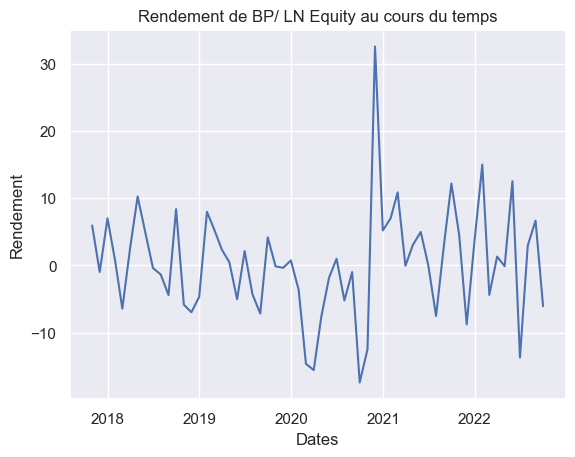

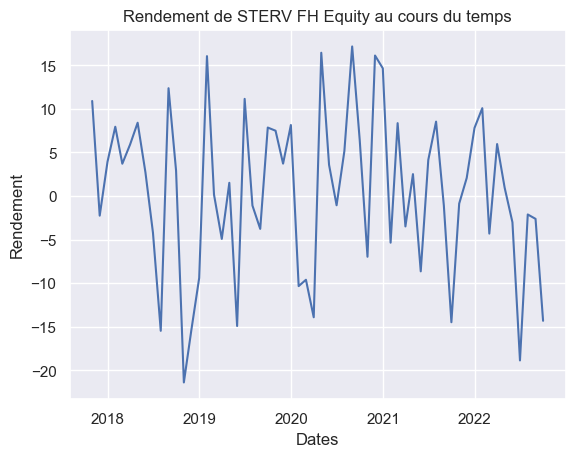

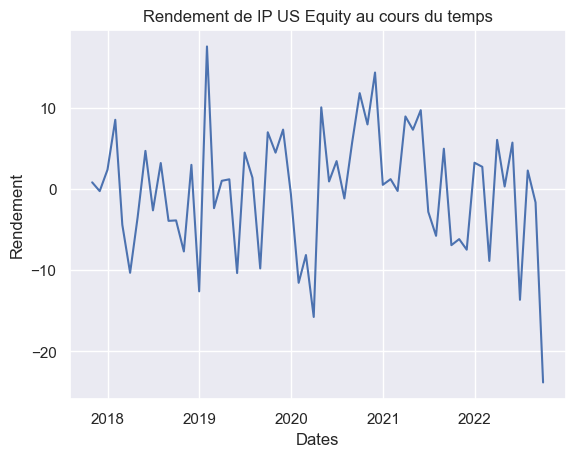

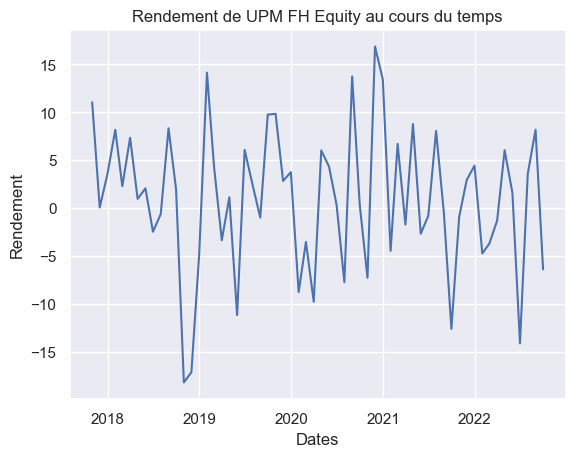

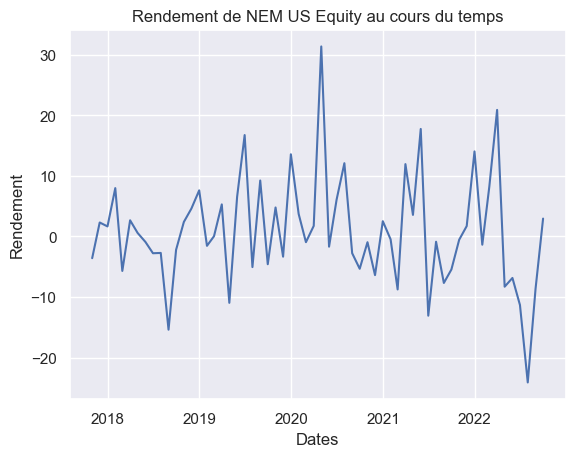

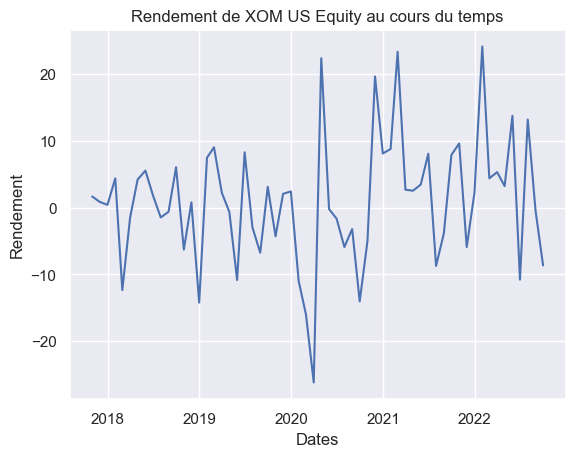

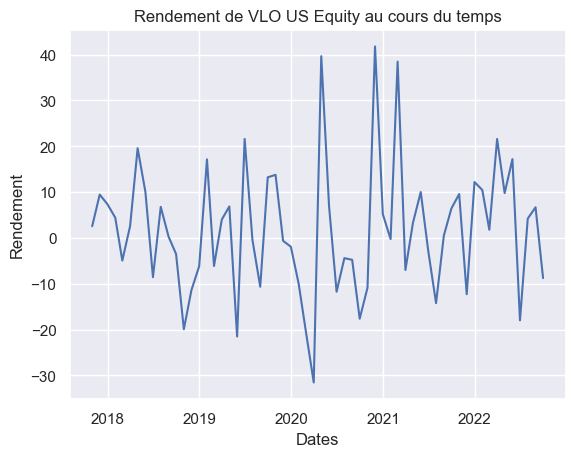

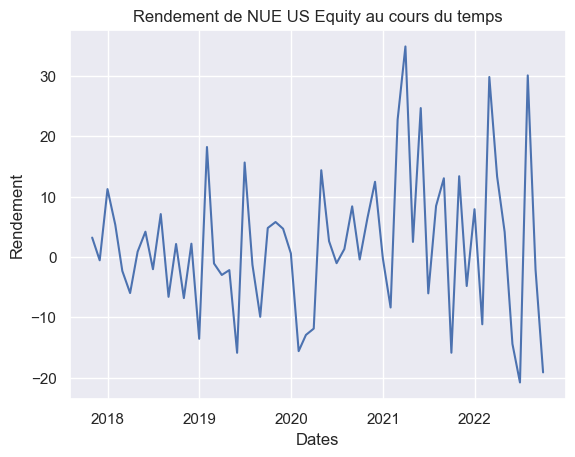

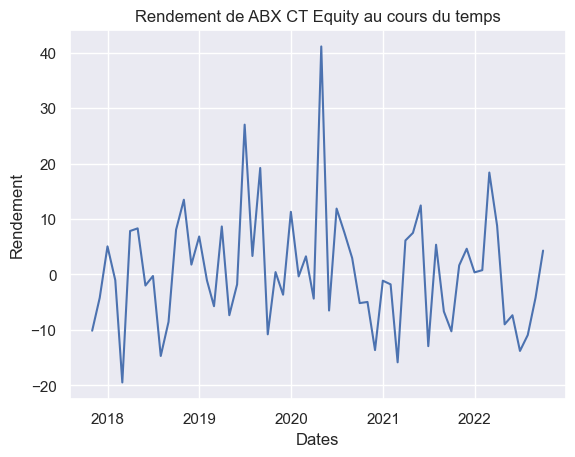

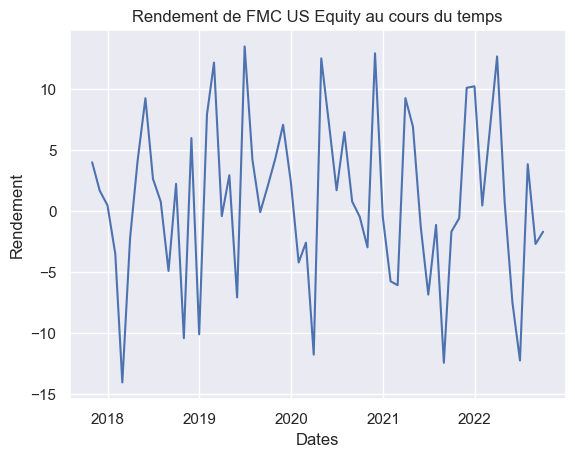

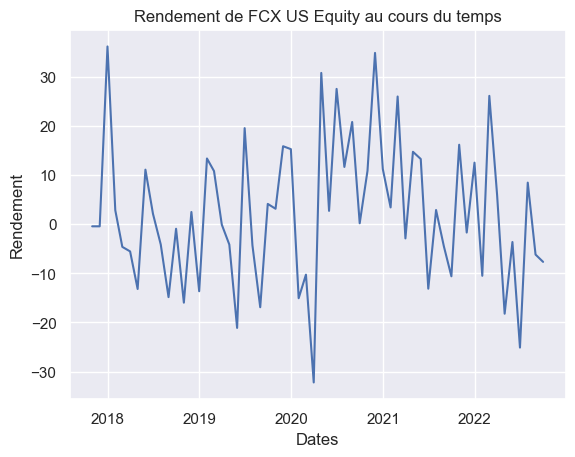

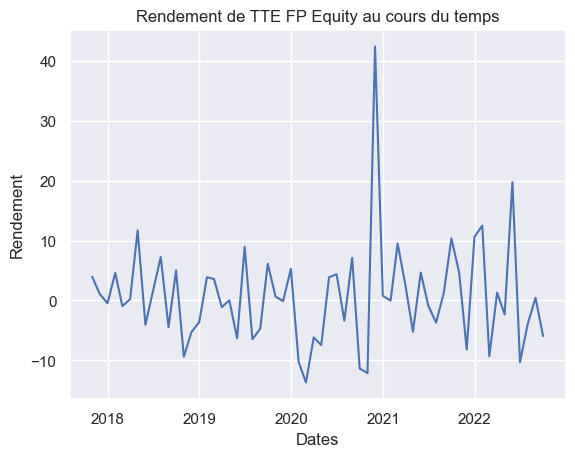

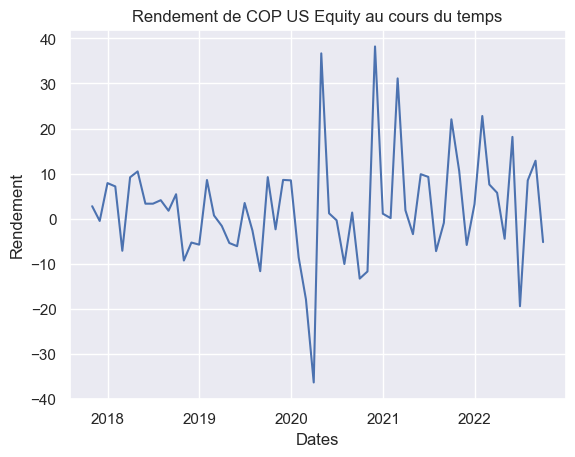

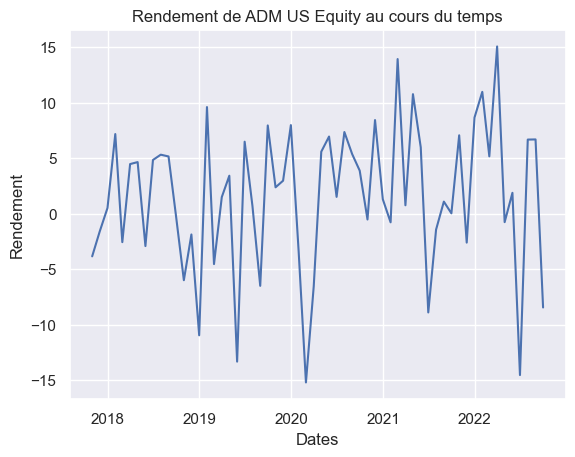

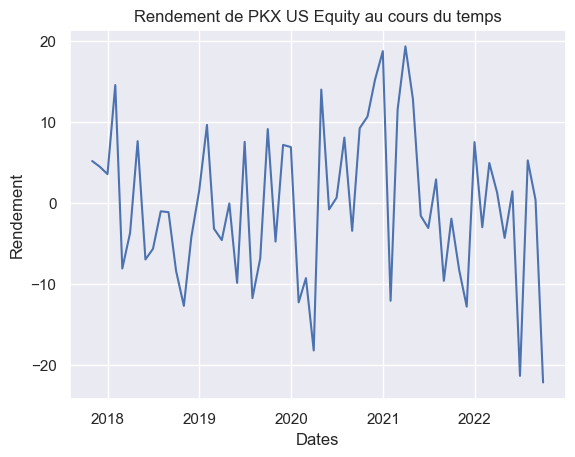

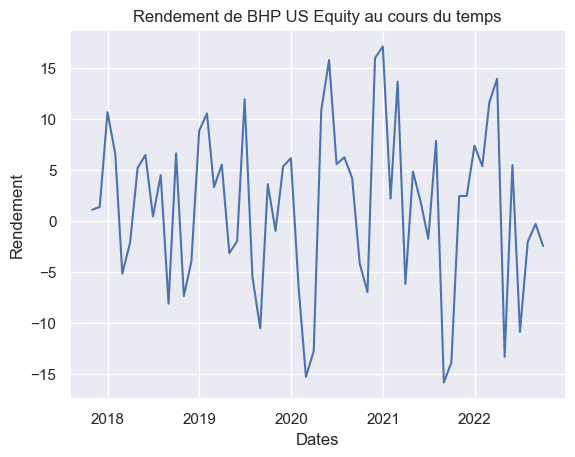

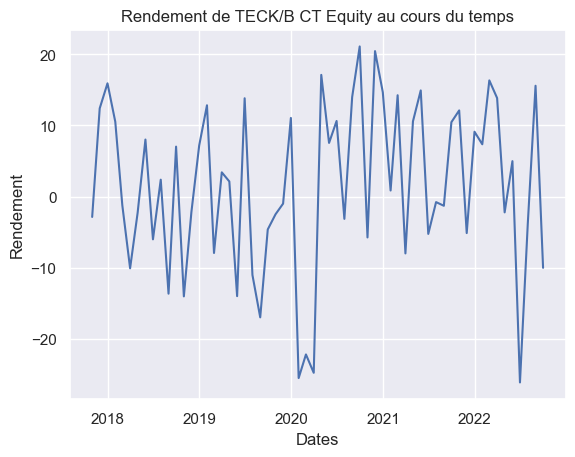

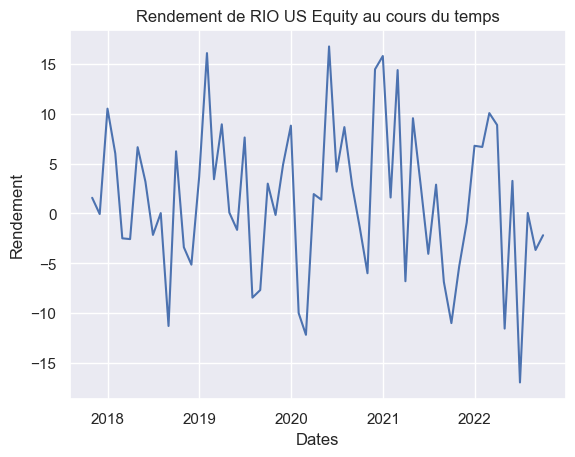

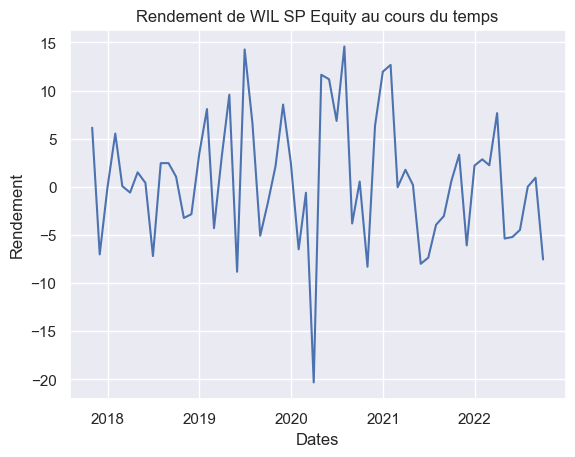

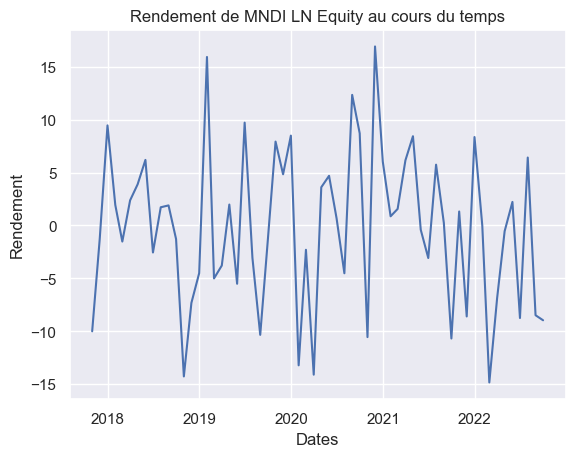

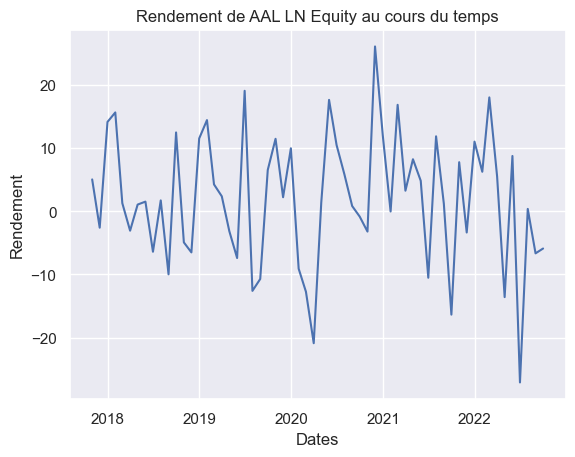

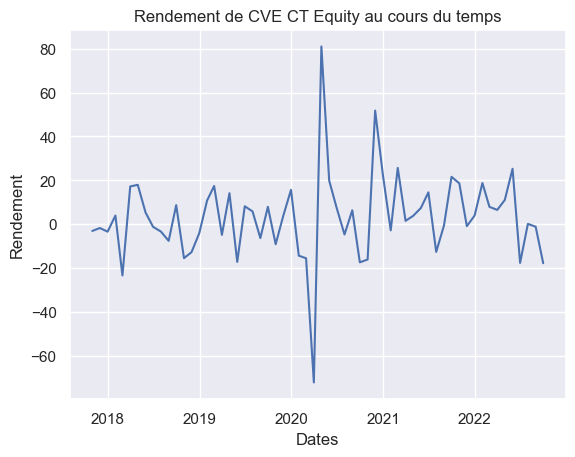

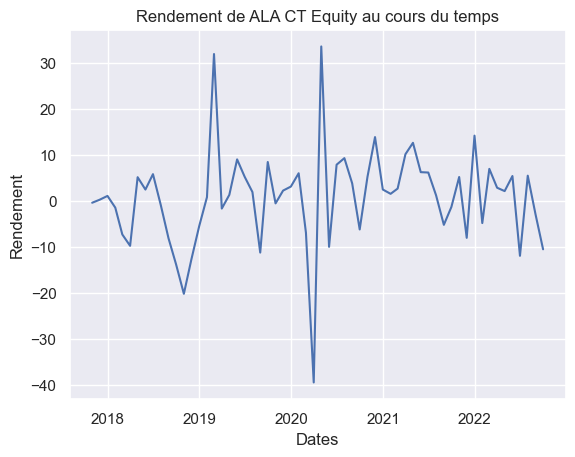

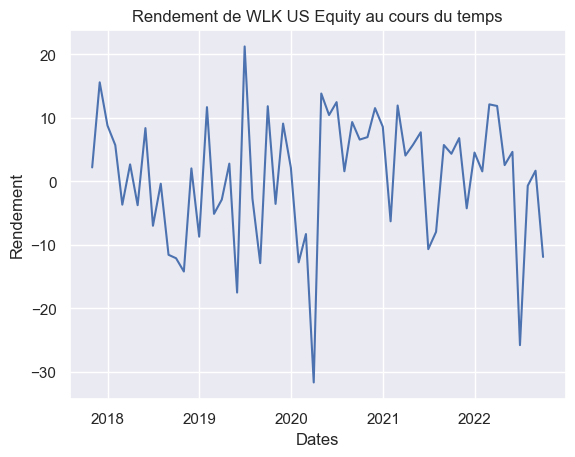

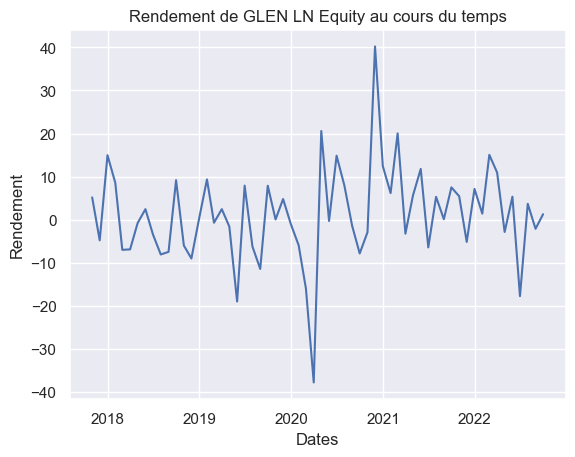

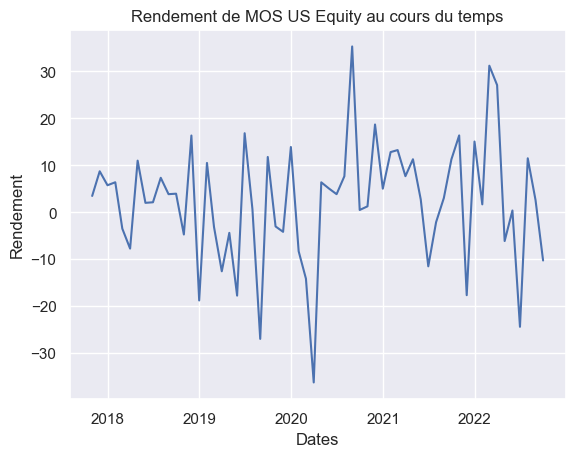

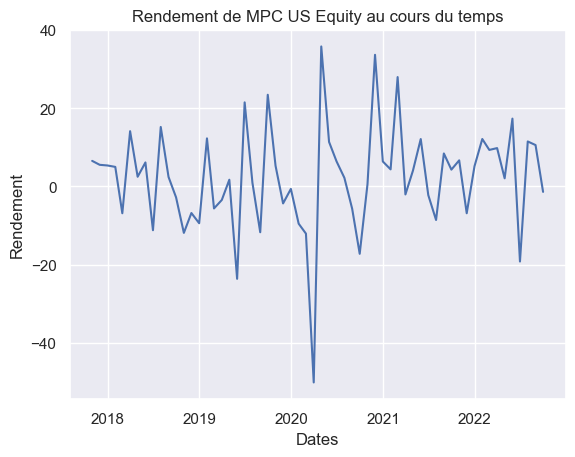

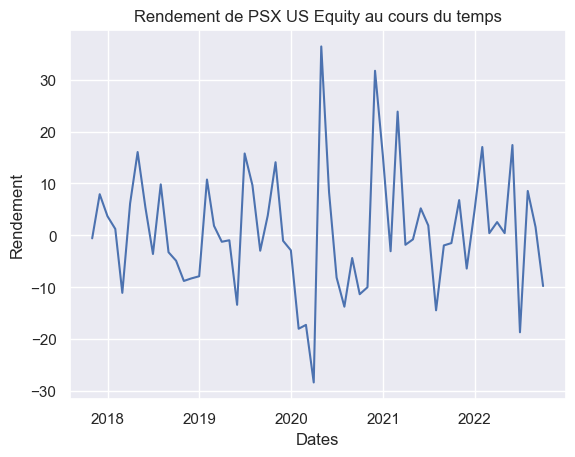

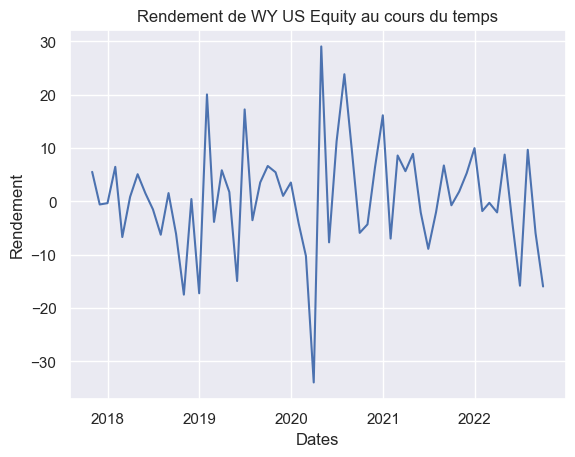

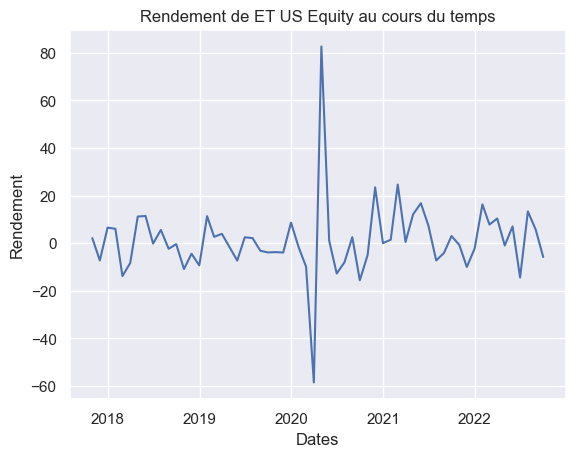

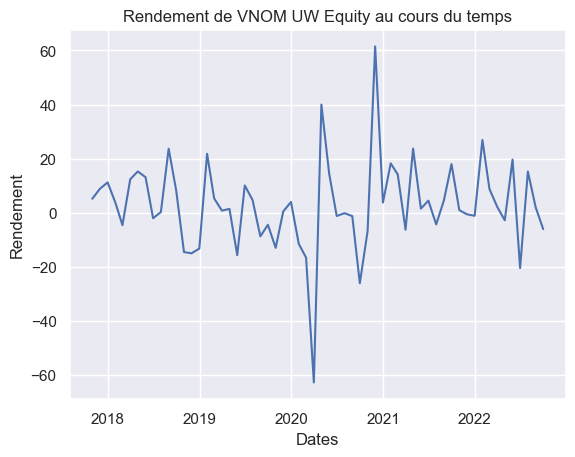

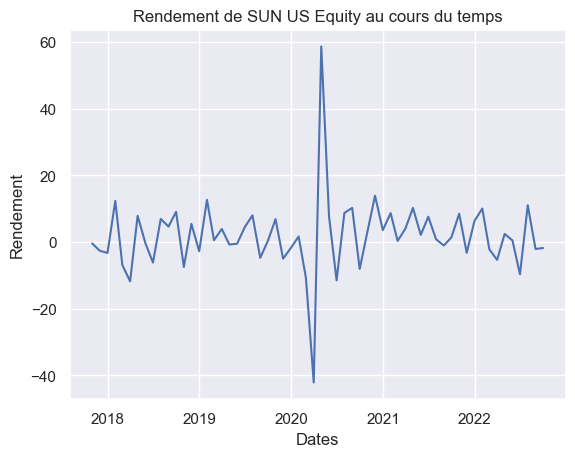

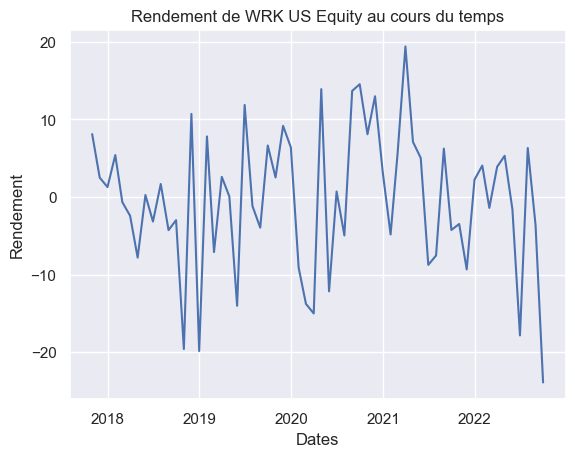

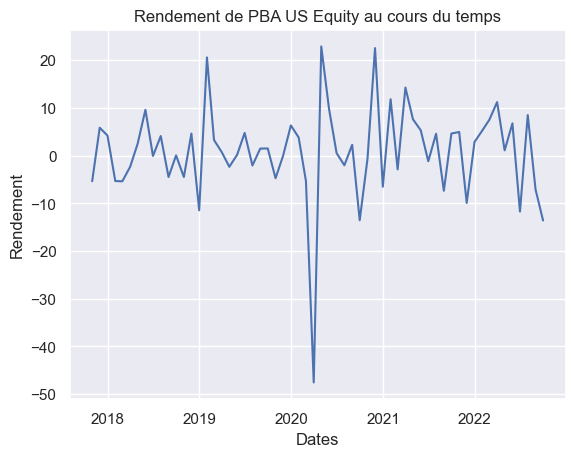

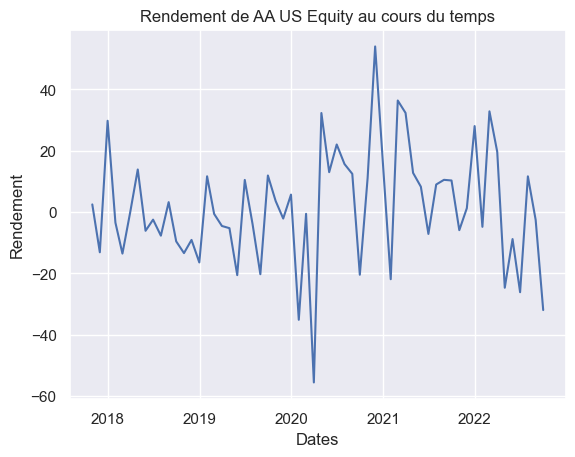

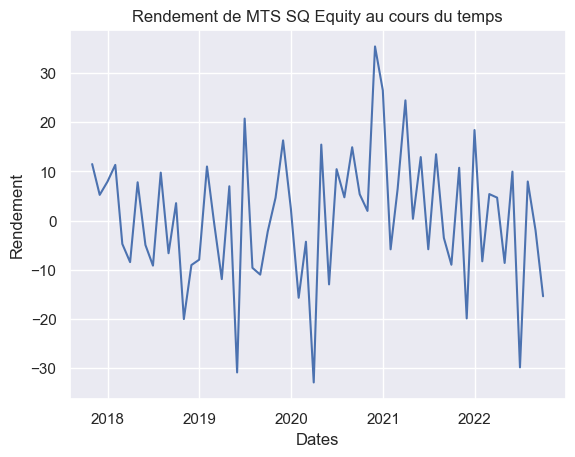

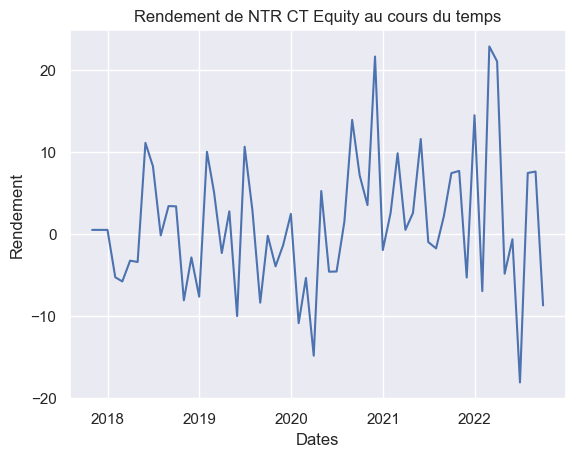

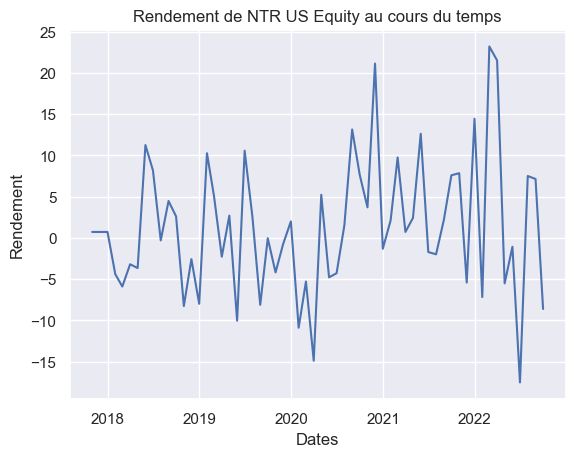

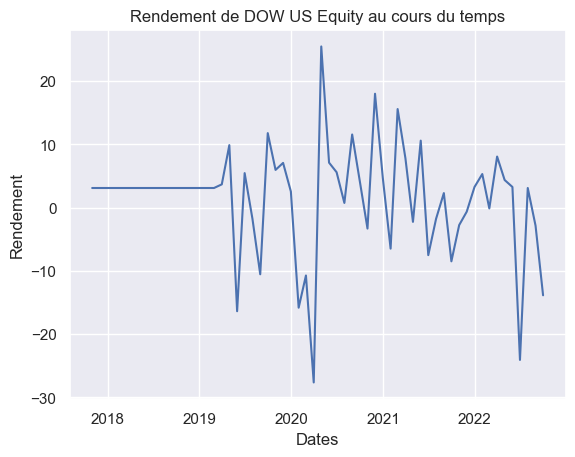

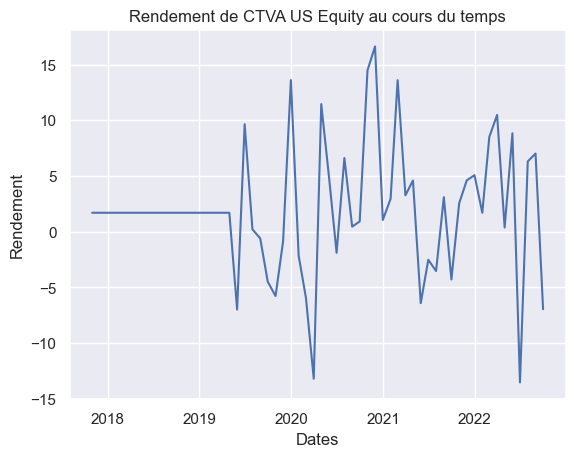

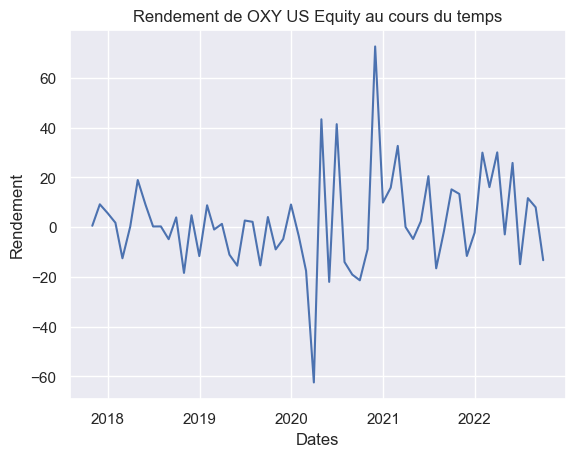

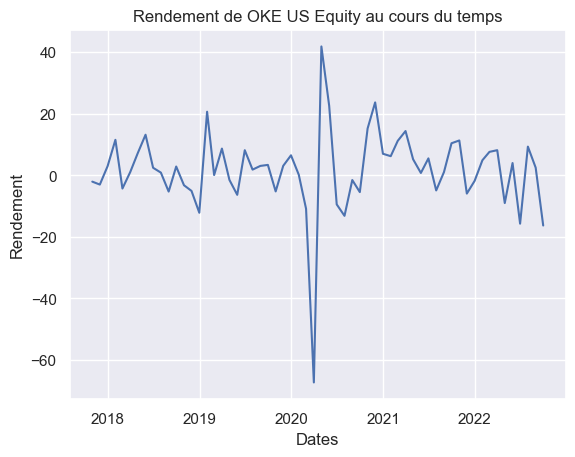

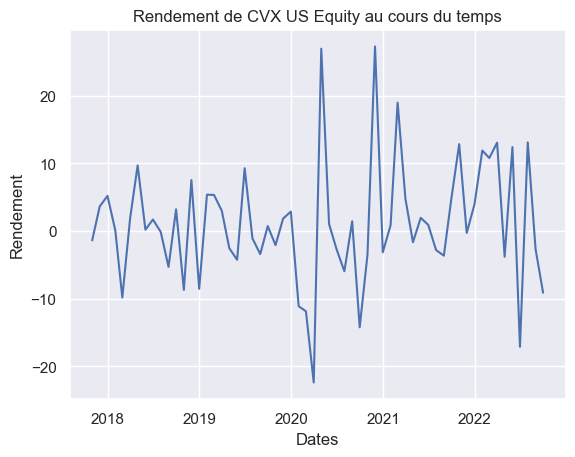

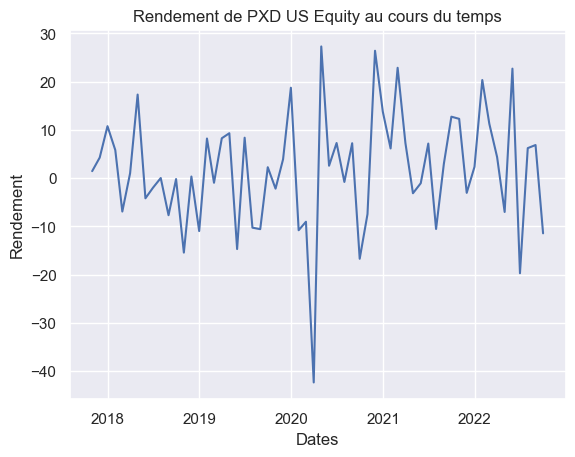

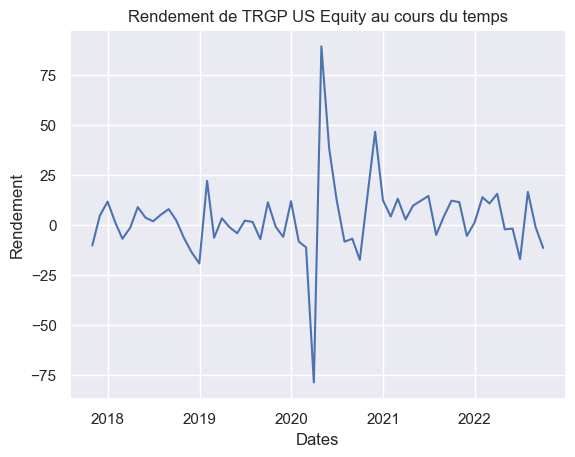

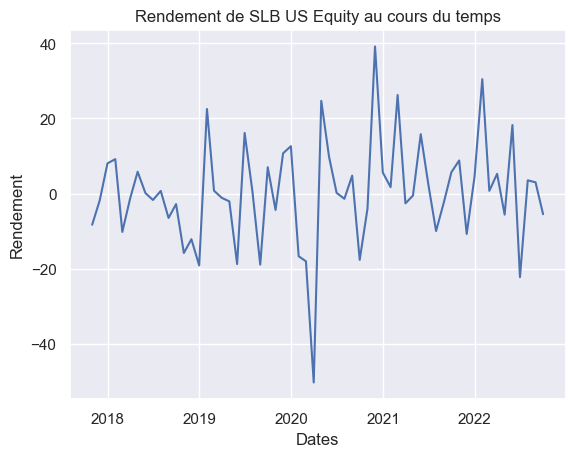

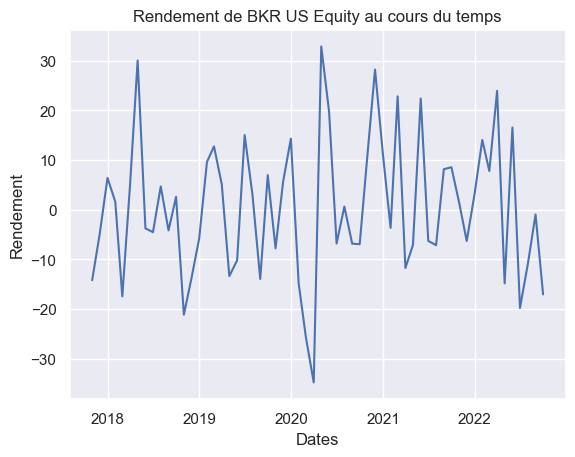

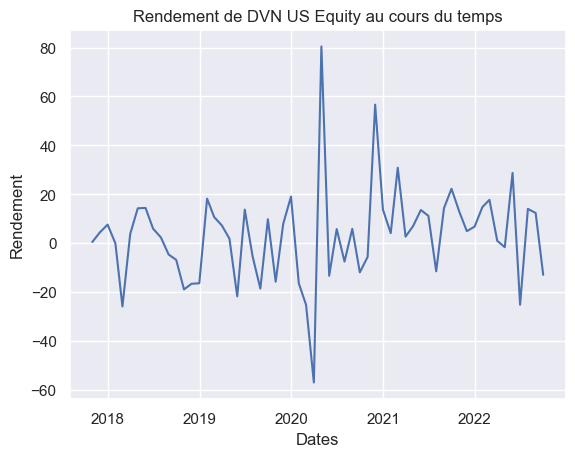

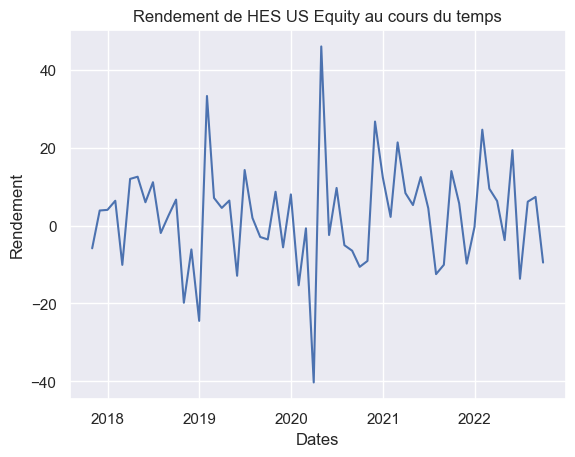

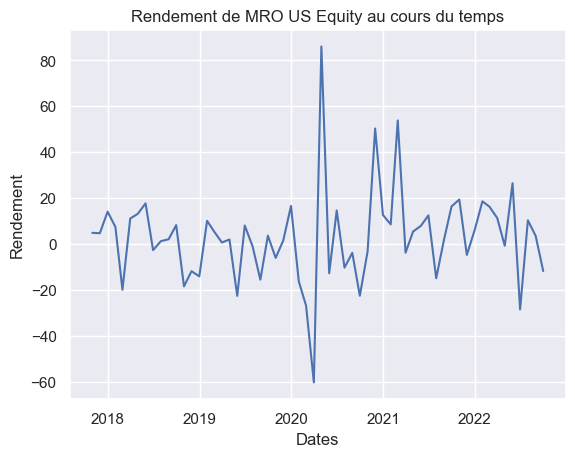

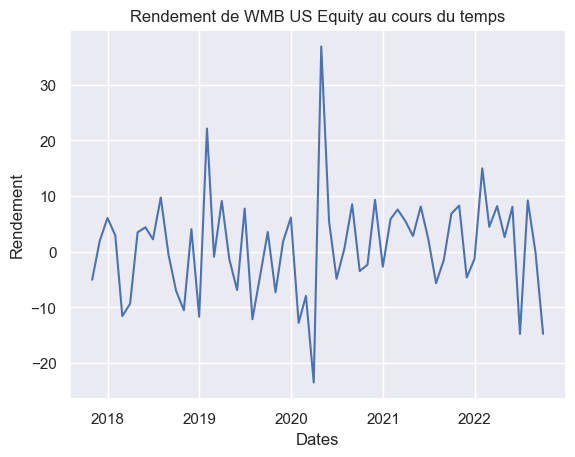

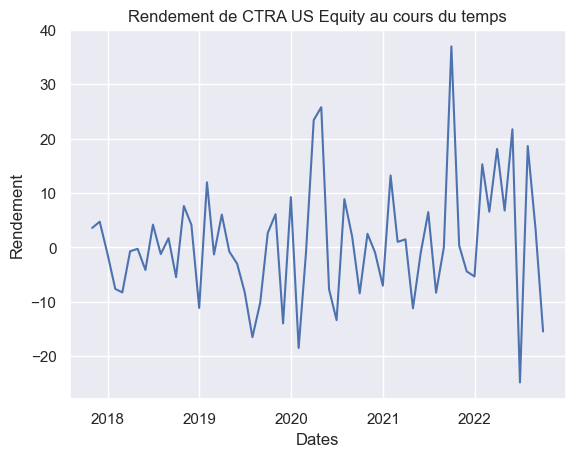

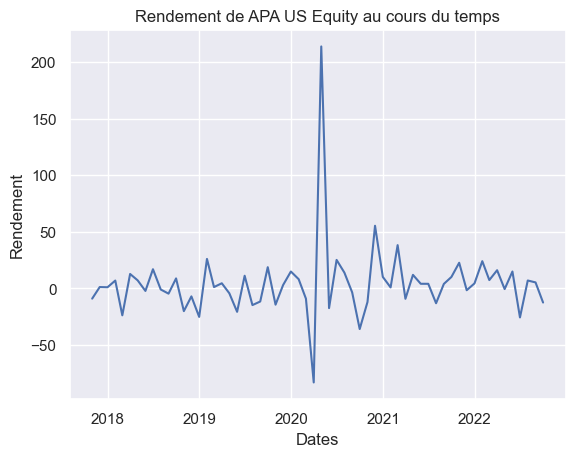

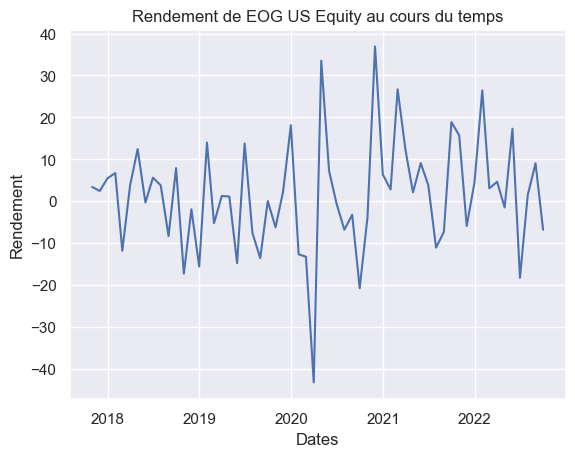

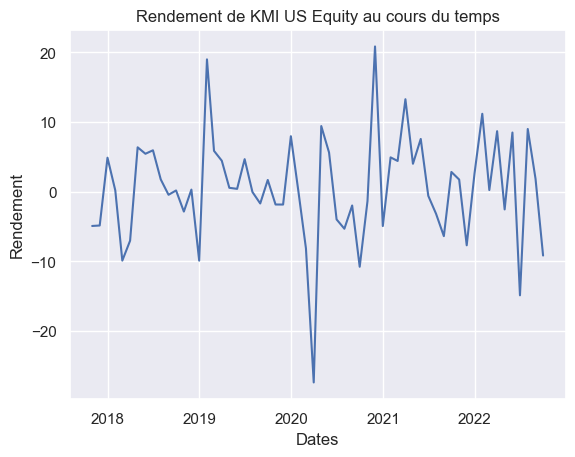

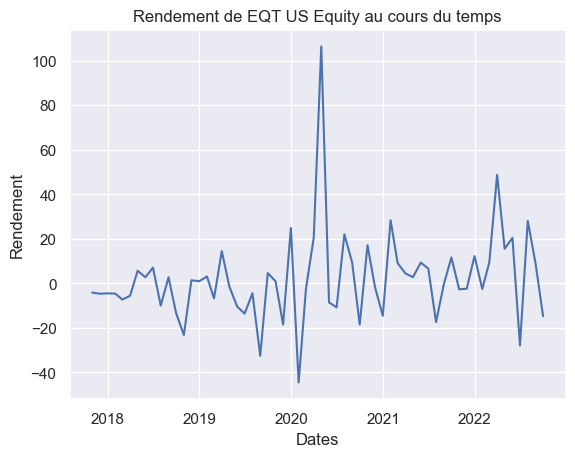

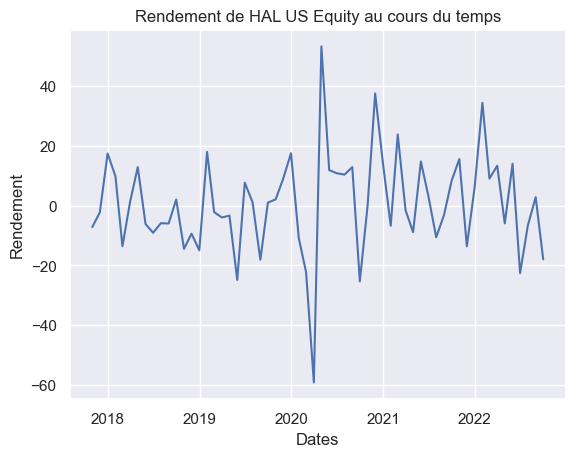

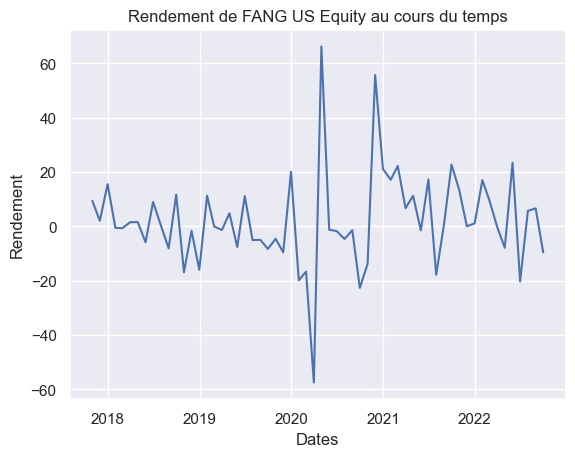

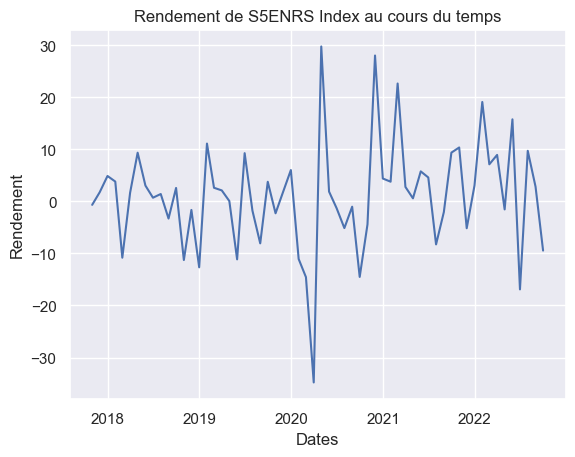

In [42]:
sns.set_theme(style="darkgrid")

for col in returns.columns:
    plt.figure()
    ax = sns.lineplot(x=returns.index, y=col, data=returns)
    ax.set_ylabel("Rendement")
    plt.title("Rendement de {} au cours du temps".format(col))
    plt.show()

C:\Users\secoskun\AppData\Local\Temp\ipykernel_29692\2856057984.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


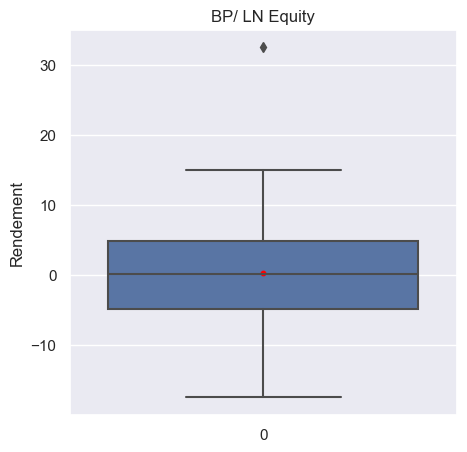

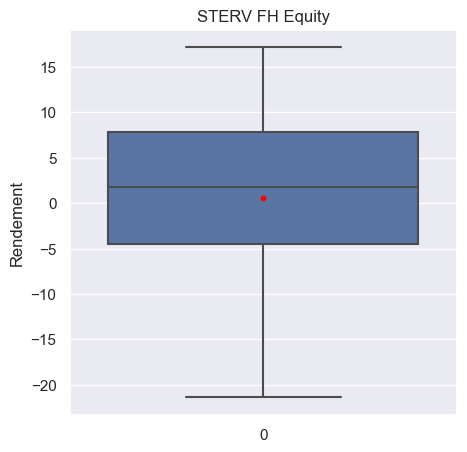

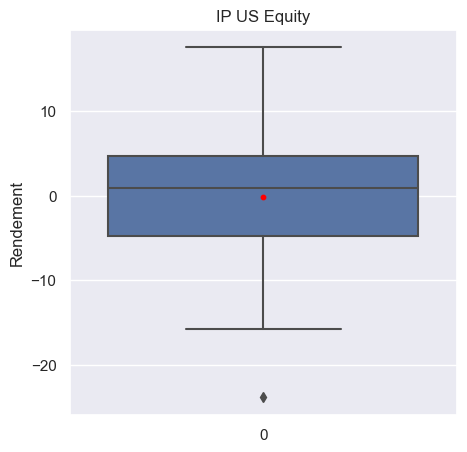

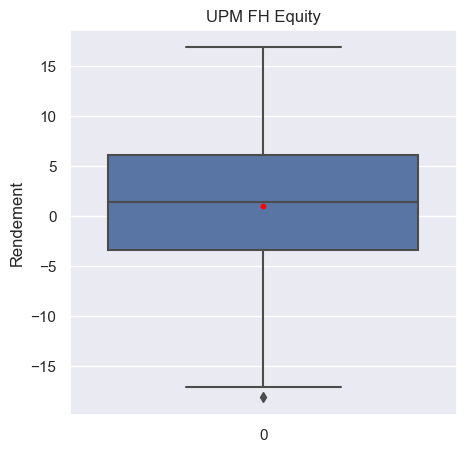

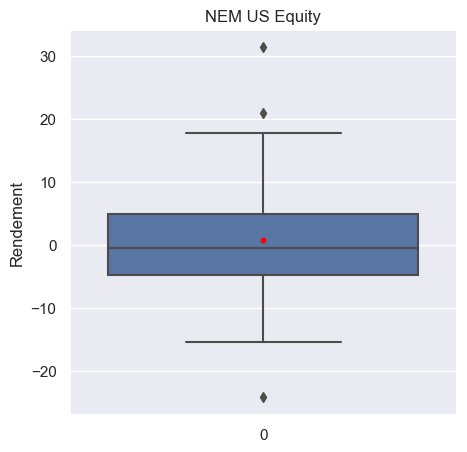

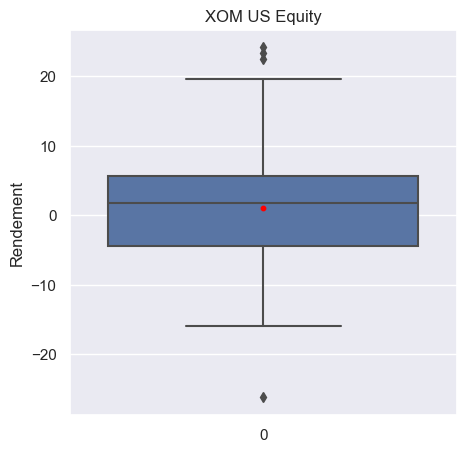

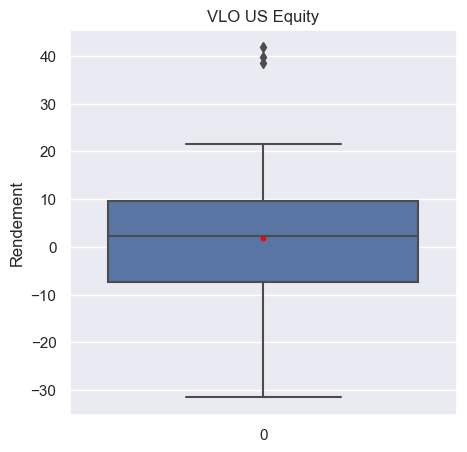

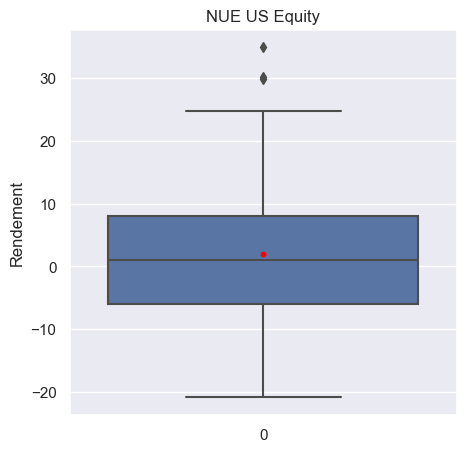

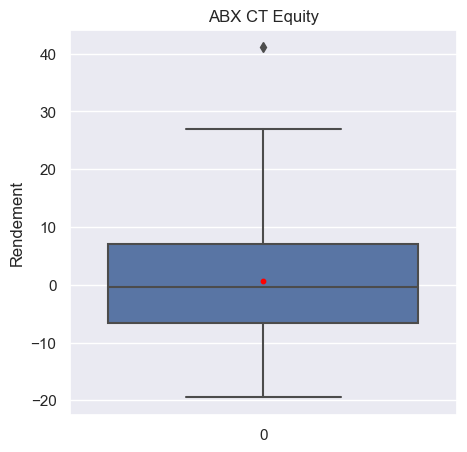

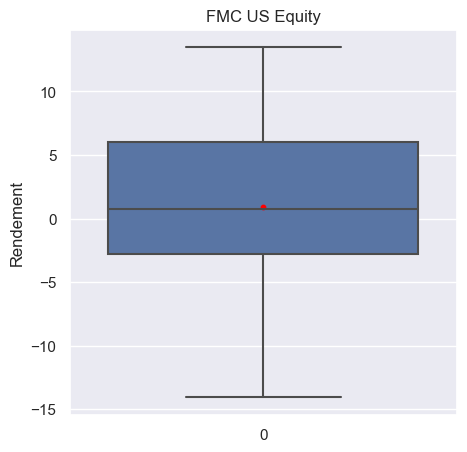

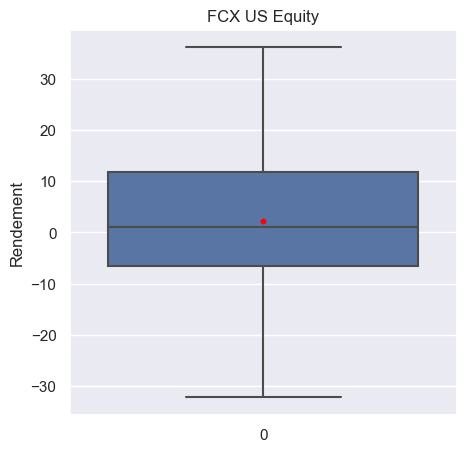

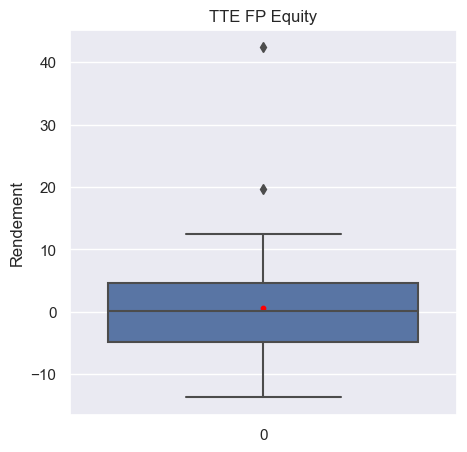

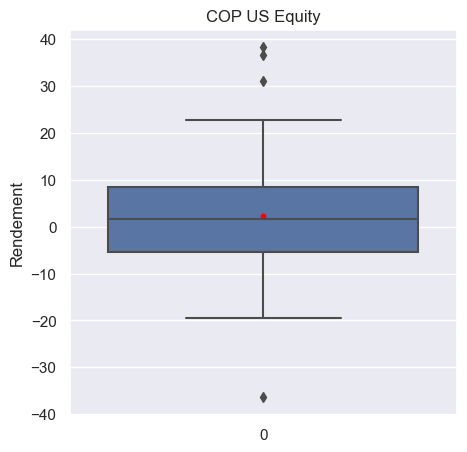

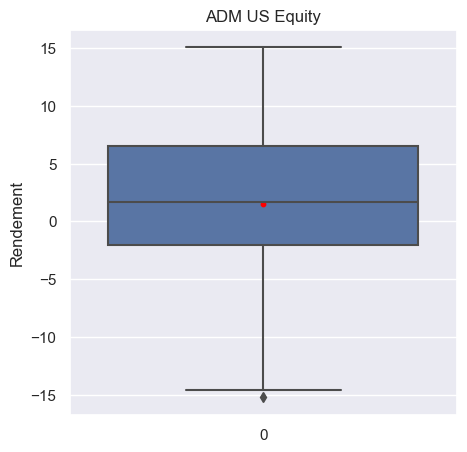

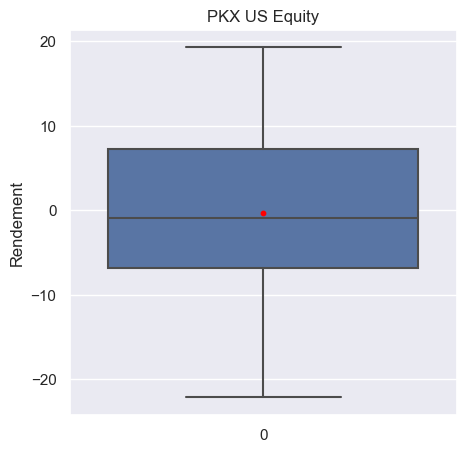

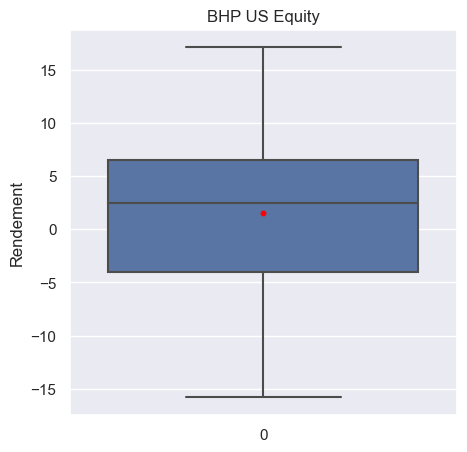

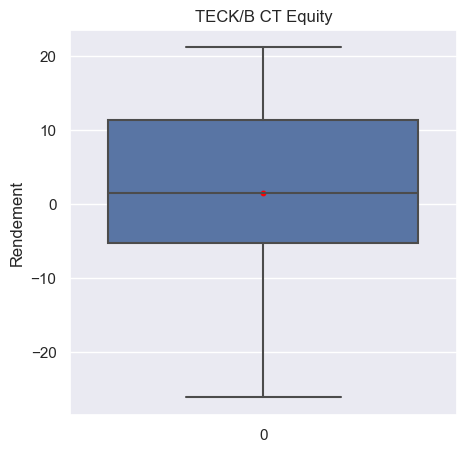

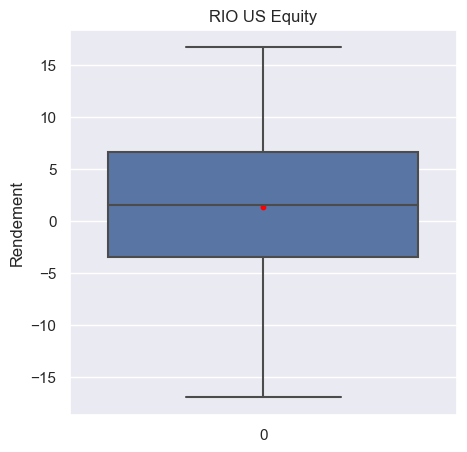

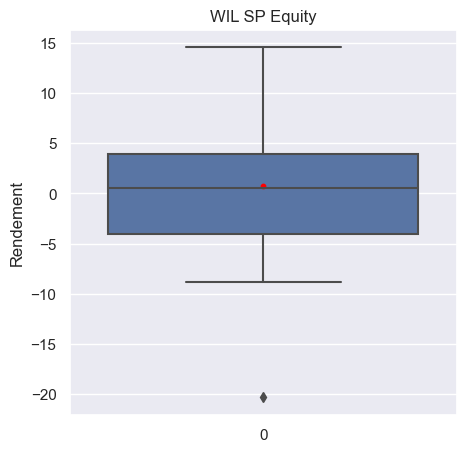

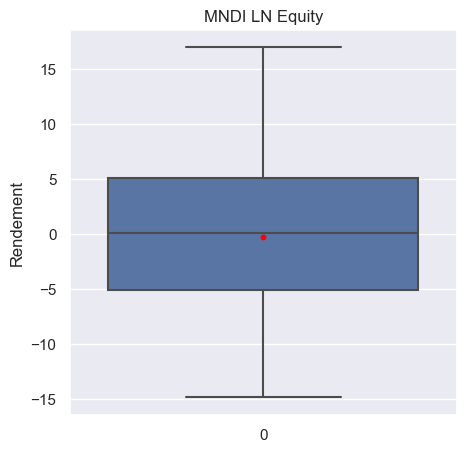

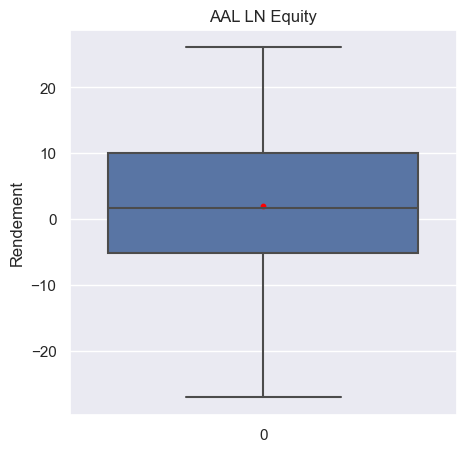

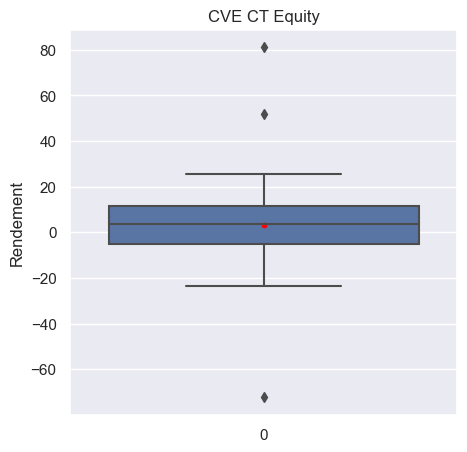

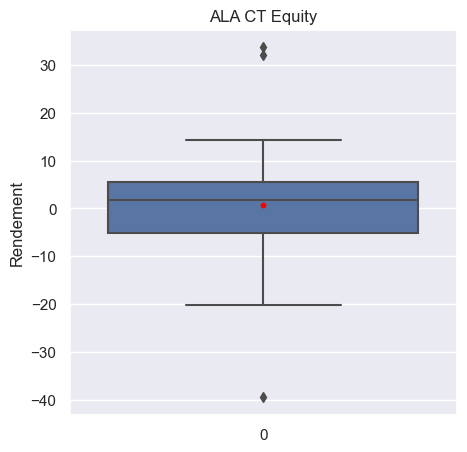

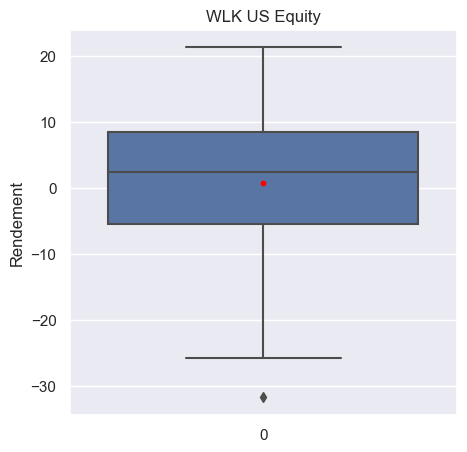

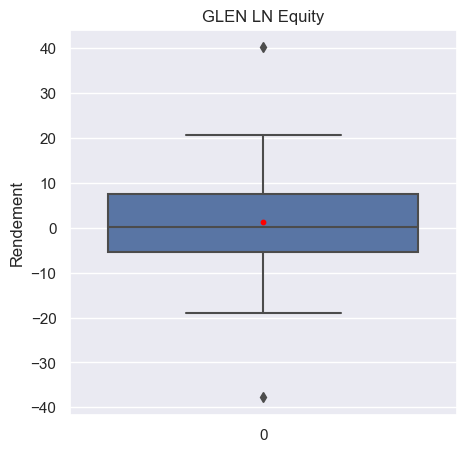

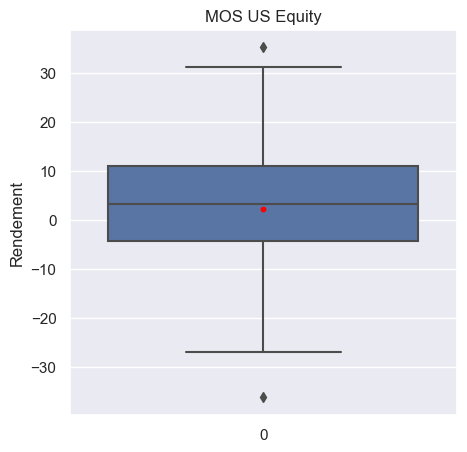

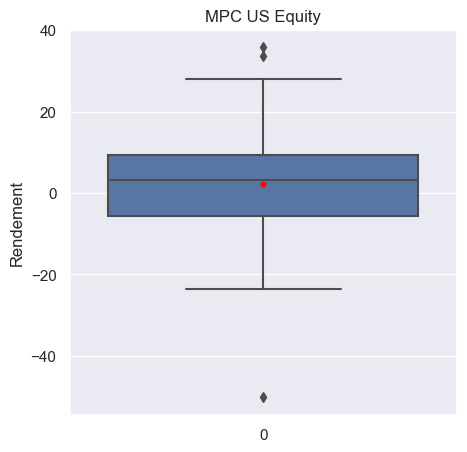

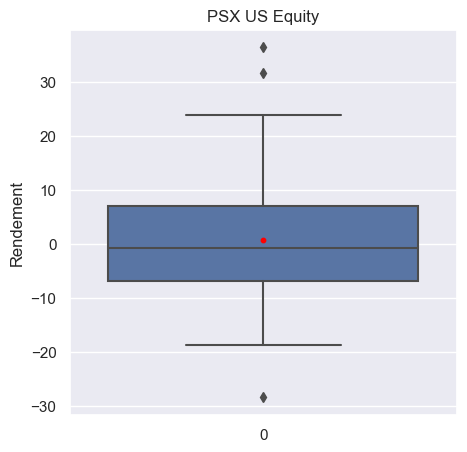

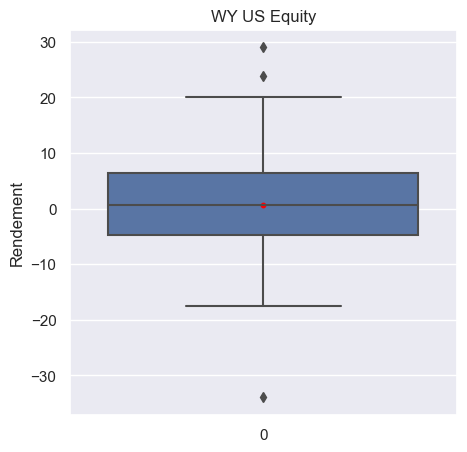

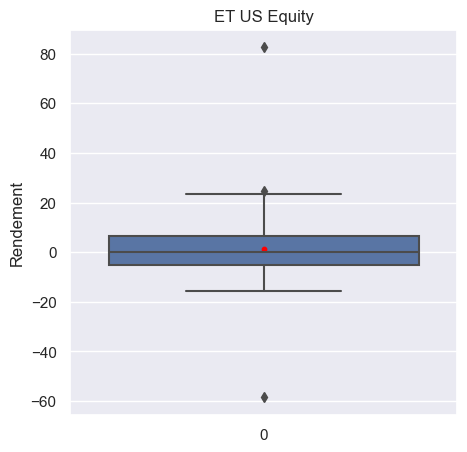

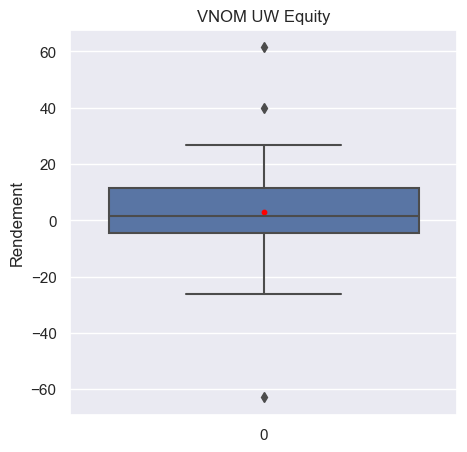

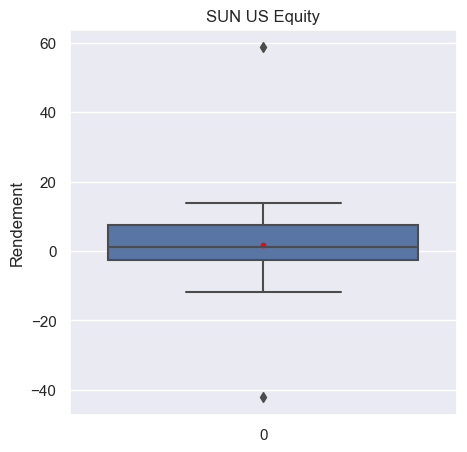

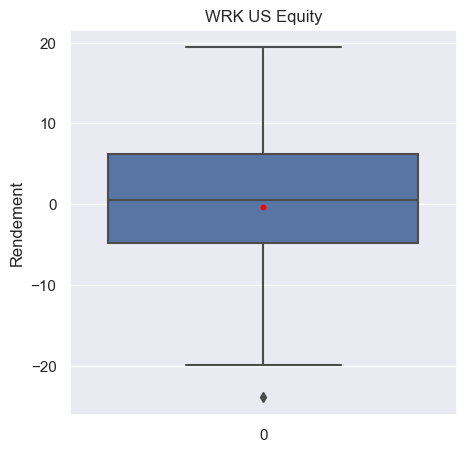

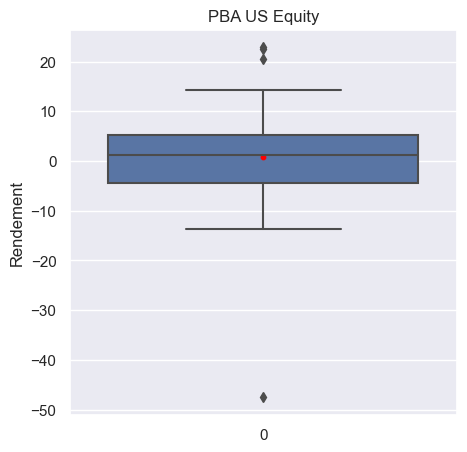

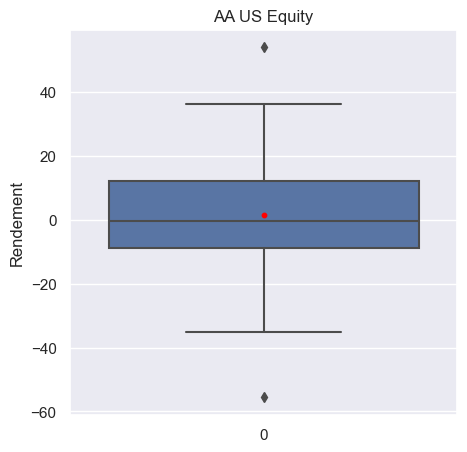

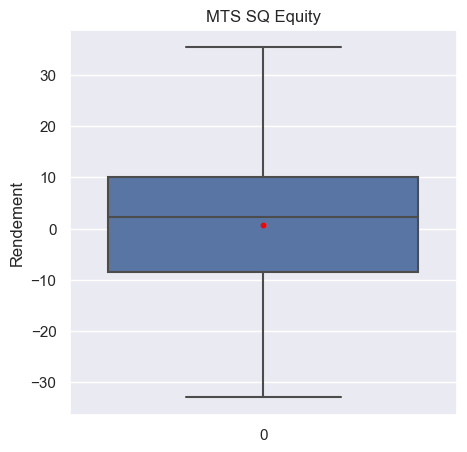

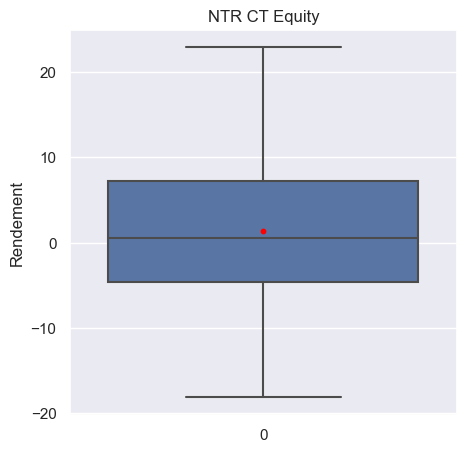

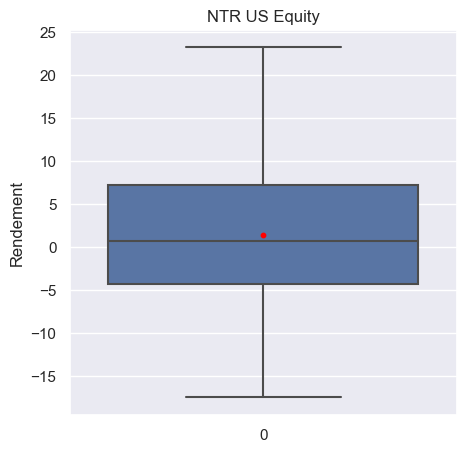

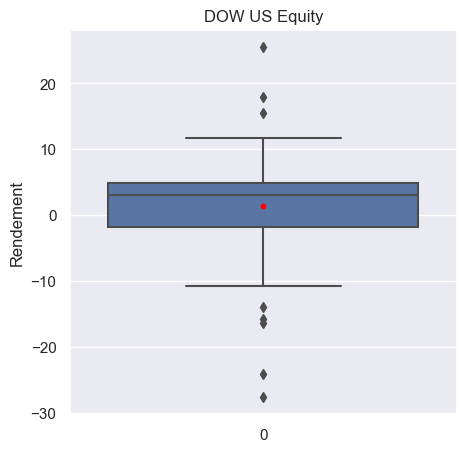

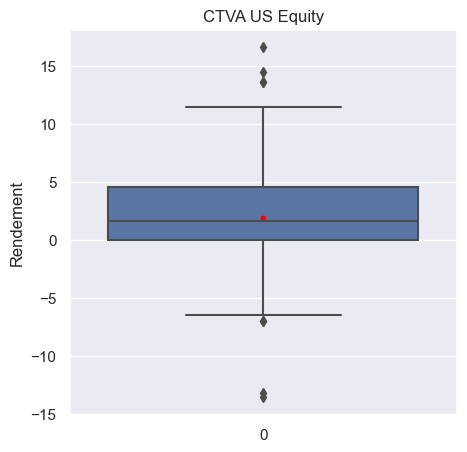

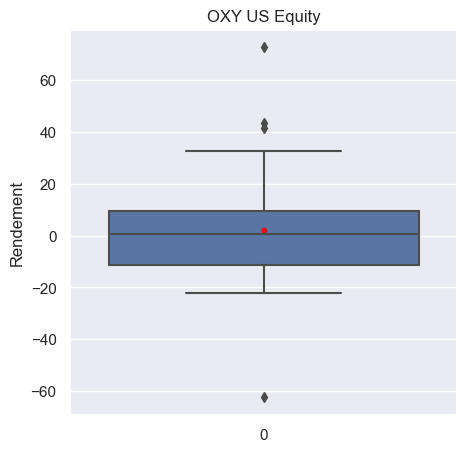

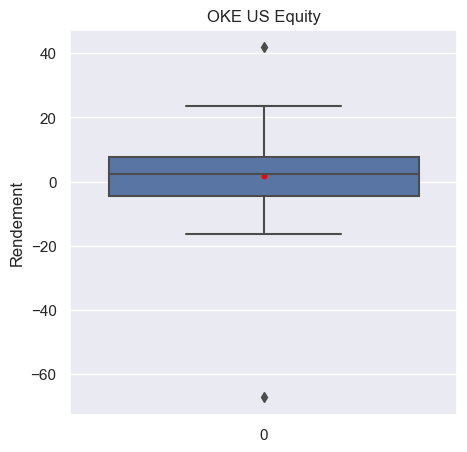

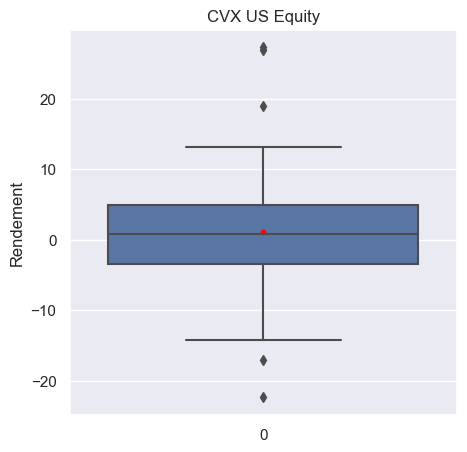

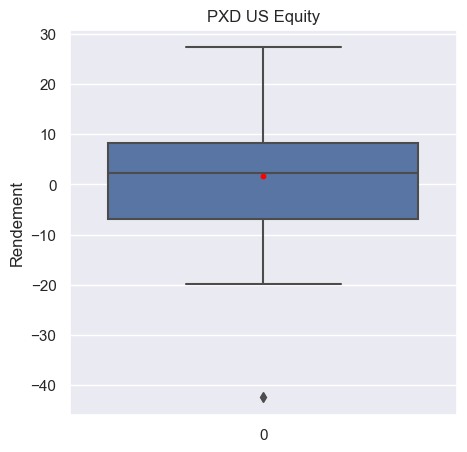

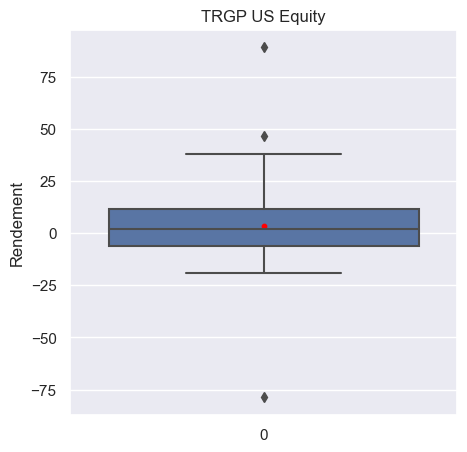

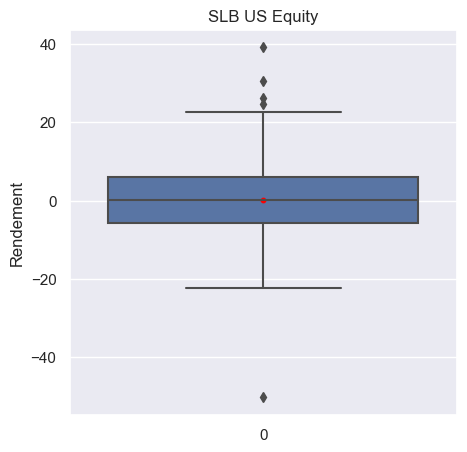

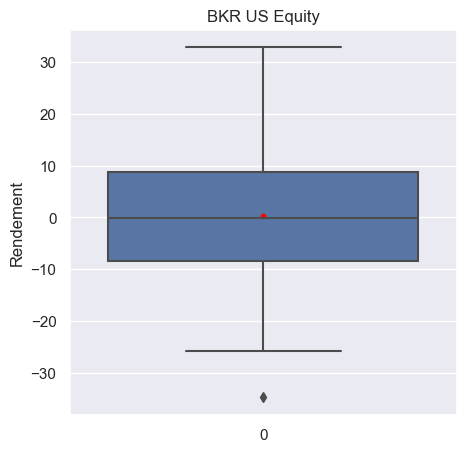

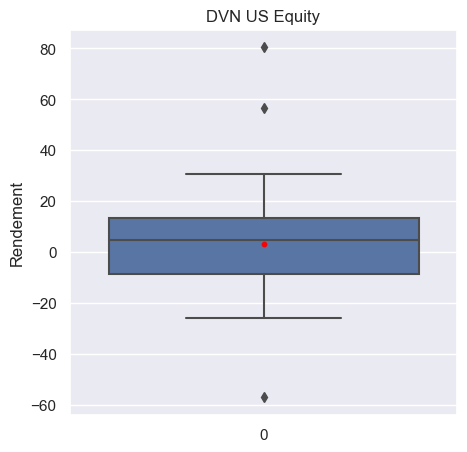

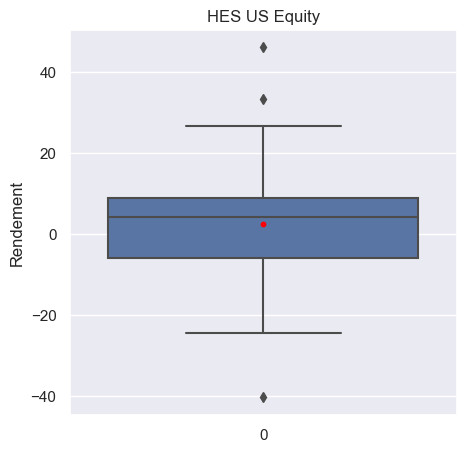

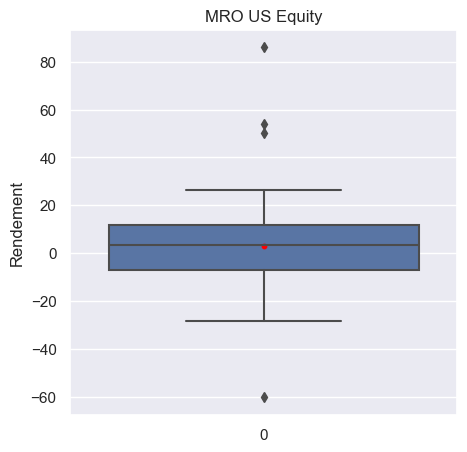

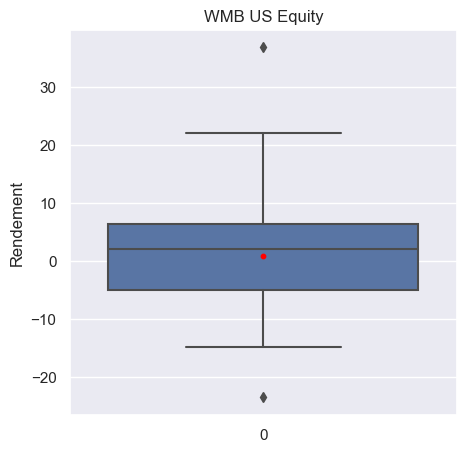

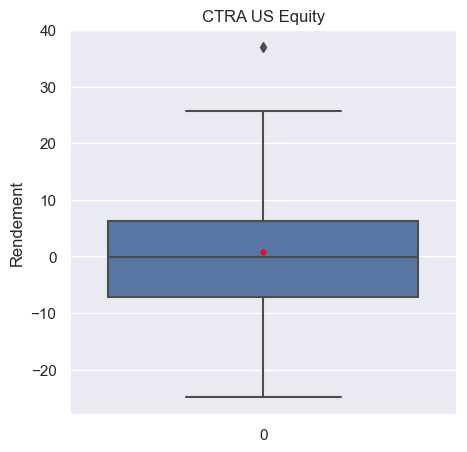

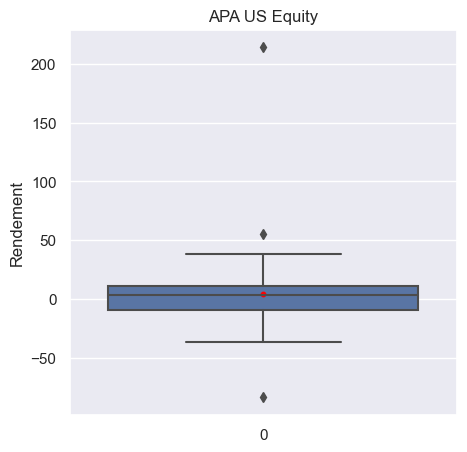

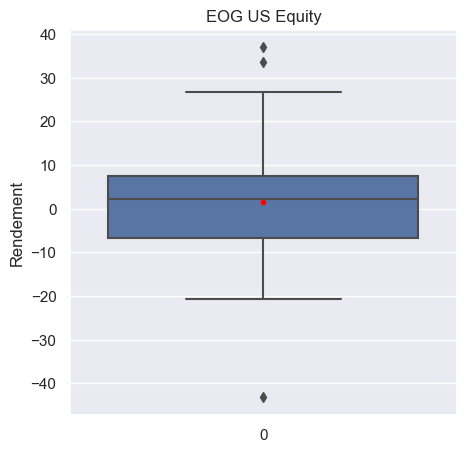

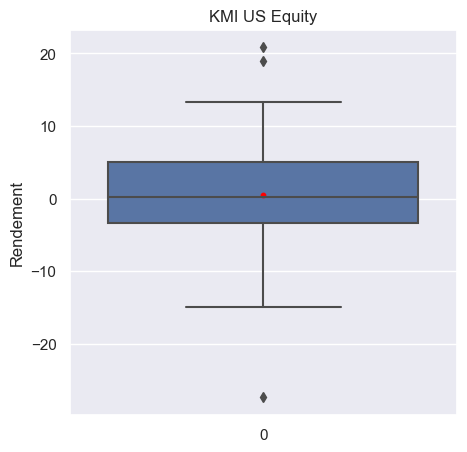

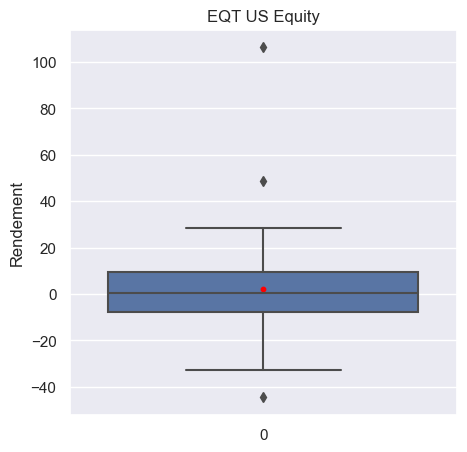

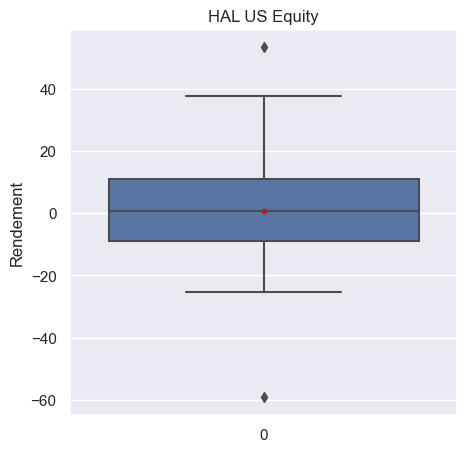

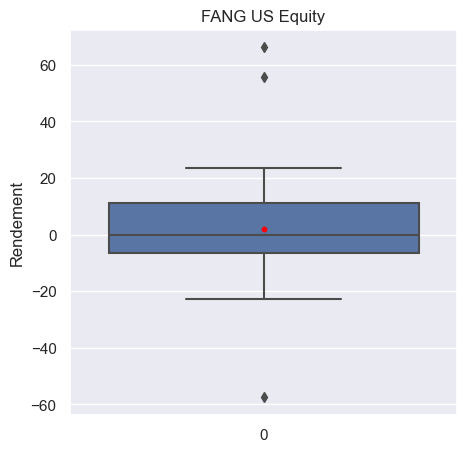

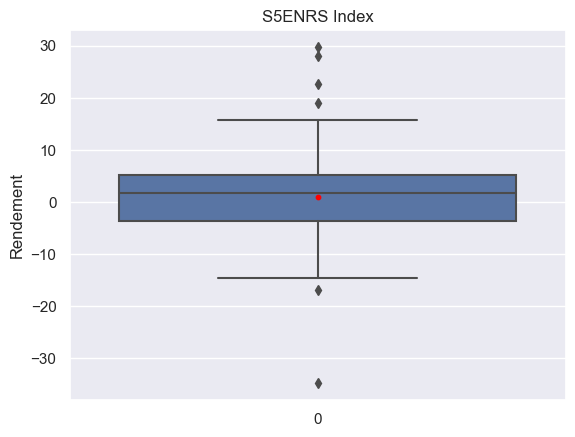

In [45]:
sns.set_theme(style="darkgrid")

for col in returns.columns:
    plt.figure()
    ax.figure.set_size_inches(5,5)
    ax = sns.boxplot(returns[col])
    ax.scatter([0], [np.mean(returns[col])], color='red', s=10) #[0] : coordonnée du point rouge de taille s=10s
    ax.set_ylabel("Rendement")
    plt.title(col)  
    col = col.replace(" ","_")  #pour ne pas avoir d'espaces dans le titres
    col = col.replace("/","_")


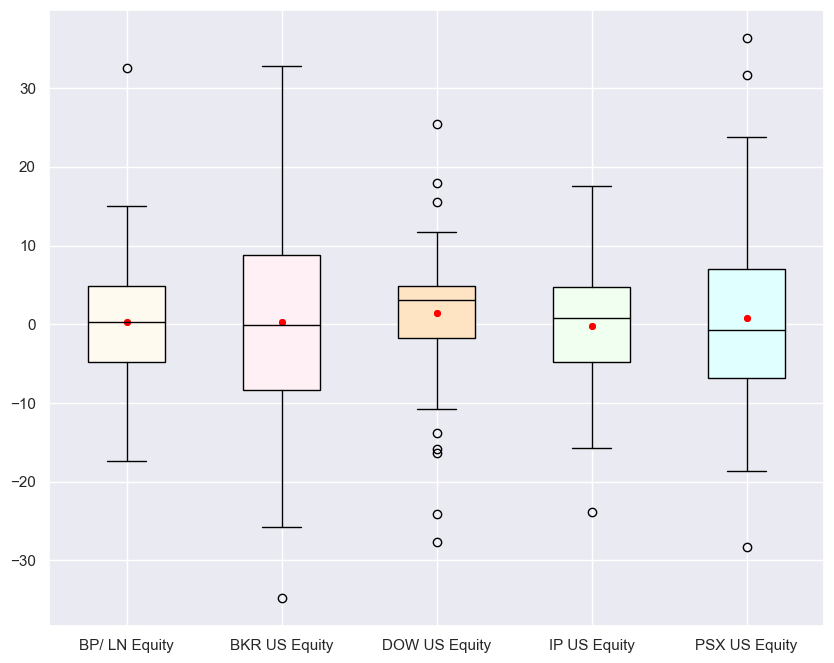

In [46]:
data = returns[['BP/ LN Equity','BKR US Equity','DOW US Equity', 'IP US Equity', 'PSX US Equity']]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True,
                medianprops={'color': 'black'},
                boxprops={'color': 'black', 'facecolor': 'none'})

colors = ['floralwhite', 'lavenderblush', 'bisque', 'honeydew', 'lightcyan']

for i in range(len(bp['boxes'])):
    bp['boxes'][i].set_facecolor(colors[i])

means = [np.mean(data[d]) for d in data]
for i, mean in enumerate(means):
    ax.plot([i+1, i+1], [mean, mean], color='red', marker='o', markersize=4)

ax.set_xticklabels(['BP/ LN Equity','BKR US Equity','DOW US Equity','IP US Equity', 'PSX US Equity'])

plt.savefig(f'boxplots/plots.png')


moyenne<médiane: : Sterv FH , IP US, UPM FH, XOM US, BHP US, WLK US, WRK US, MTS SQ, DOW US, HES US, WMB US, MNDI LN, ALA CT, MOS US,  MPC US, MTS SQ, PXD UD, DVN US, EOG US,S5ENRS Index

moyenne>médiane: NEM US, PSX US, NUE US, ABX CT, FCX US, GLEN LN, PSX US, AA US, NTR CT, NTR US, CTRA US, EQT US, FANG US, 

moyenne et médiane très proches : BP/LN, VLO US, FMC US, TTE FP,COP US, ADM US, PKX US, TECK/B CT, RIO US, WIL SP, AAL LN, CVE CT, WY US, ET US, VNOM UW, SUN US, PBA US, CTVA US, OXY US, OKE US, CVX US, TRGP US, SLB US, BKR US, MRO US, APA US, KMI US, HAL US   

## Question 2

In [49]:
cumul_sums = pd.DataFrame()

for col in returns.columns: 
    cumul_sums[col] = 100 + returns[col].cumsum()
    
cumul_sums = cumul_sums.set_index(returns.index)

cumul_sums.head()

BP/ LN Equity STERV FH Equity IP US Equity UPM FH Equity  \
Dates                                                                 
2017-10-31    105.919372       110.90907   100.791975     111.03876   
2017-11-30    104.930635      108.662493    100.50375    111.106972   
2017-12-31    111.919061      112.594384   102.853158    114.687216   
2018-01-31    112.465215      120.550335   111.344701    122.858611   
2018-02-28    106.015929      124.263501   106.919028      125.1489   

           NEM US Equity XOM US Equity VLO US Equity NUE US Equity  \
Dates                                                                
2017-10-31      96.40096    101.671139    102.547771    103.194147   
2017-11-30     98.696314    102.526867    112.004104    102.623509   
2017-12-31    100.340923    102.947086    119.350519    113.850489   
2018-01-31    108.310006    107.322982    123.767884    119.166626   
2018-02-28     102.60771     94.962842    118.833246    116.836877   

           ABX CT Equity FMC US Equity FCX US Equity TTE FP Equity  \
Dates                                                                
2017-10-31      89.85604    103.974919      99.57265     103.95282   
2017-11-30     85.631515     105.63333     99.143465    105.047369   
2017-12-31     90.697582    106.082916    135.350365     104.56782   
2018-01-31      89.66132    102.565063    138.198466    109.160069   
2018-02-28      70.18809     88.495203    133.583081    108.207211   

           COP US Equity ADM US Equity PKX US Equity BHP US Equity  \
Dates                                                                
2017-10-31    102.746029     96.142084    105.158502    101.110289   
2017-11-30     102.21817     94.521229    109.625479    102.501211   
2017-12-31    110.099459     95.022734    113.167945    113.187131   
2018-01-31    117.241015    102.183413    127.695015     119.77552   
2018-02-28      110.0952     99.604821    119.603822    114.634761   

           TECK/B CT Equity RIO US Equity WIL SP Equity MNDI LN Equity  \
Dates                                                                    
2017-10-31         97.12933    101.568129    106.134326       89.99574   
2017-11-30        109.53756    101.505538     99.104544      88.699765   
2017-12-31        125.46705    112.006578     99.046993      98.164325   
2018-01-31        135.99036    118.014513     104.57274     100.111585   
2018-02-28       134.764356    115.519414    104.632987      98.593002   

           AAL LN Equity CVE CT Equity ALA CT Equity WLK US Equity  \
Dates                                                                
2017-10-31    105.044182     96.875081     99.655981    102.190396   
2017-11-30    102.450072     95.087432     99.971491    117.780336   
2017-12-31    116.594332       91.6341    101.109583    126.562119   
2018-01-31    132.243462      95.55389     99.701707    132.260045   
2018-02-28    133.525869      72.10242     92.461121    128.585661   

           GLEN LN Equity MOS US Equity MPC US Equity PSX US Equity  \
Dates                                                                 
2017-10-31     105.173638     103.47383    106.526391     99.421461   
2017-11-30     100.390785    112.202568    112.045891    107.347033   
2017-12-31     115.359295    117.955564    117.394766     111.02682   
2018-01-31     123.923761    124.346835    122.381126    112.262608   
2018-02-28     116.933883    120.848667    115.501949    101.186118   

           WY US Equity ET US Equity VNOM UW Equity SUN US Equity  \
Dates                                                               
2017-10-31   105.524537   102.128884     105.150215     99.581994   
2017-11-30   104.939742     94.88647     113.948107      96.96962   
2017-12-31   104.600567    101.42968     125.149247     93.699865   
2018-01-31   111.066818   107.455173     128.835488    106.059015   
2018-02-28   104.380616    93.645293     124.196084     99.182744   

           WRK US Equity PBA US Equity AA US Equ

In [50]:
# ordonne les titres (ie. les colonnes) par la performance cumulée à la dernière date 
# pour qu'on puisse les tracer sur chaque graphique des courbes qui sont plutôt proches
cumul_sums = cumul_sums[cumul_sums.iloc[-1].sort_values(ascending=True).index]

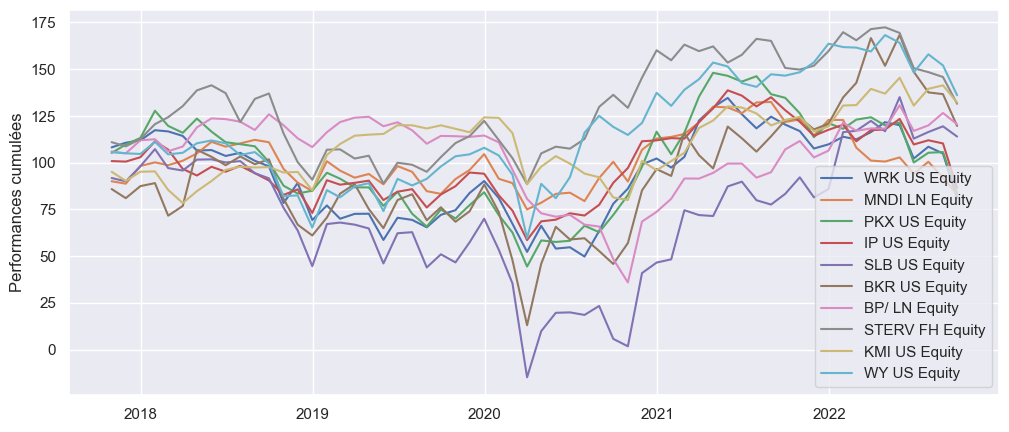

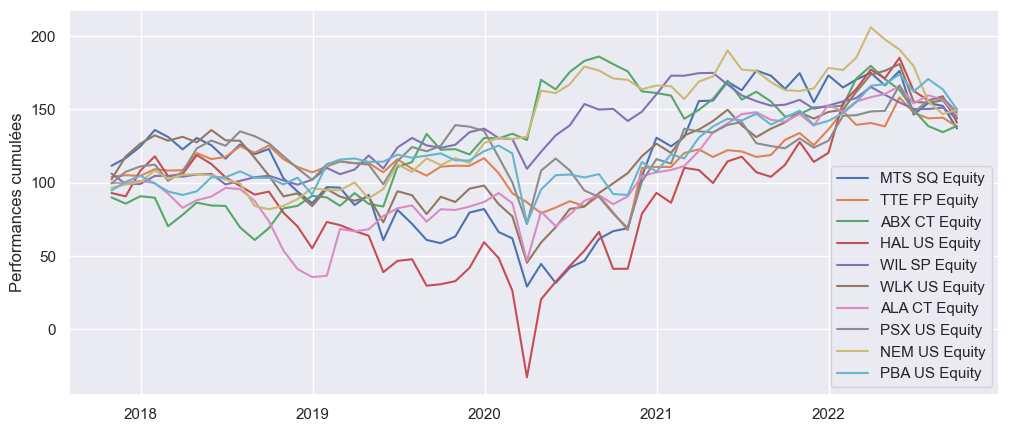

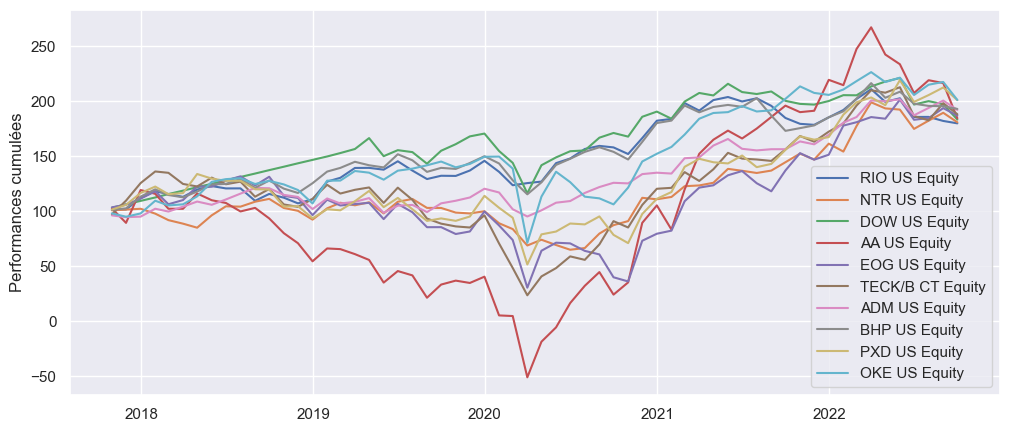

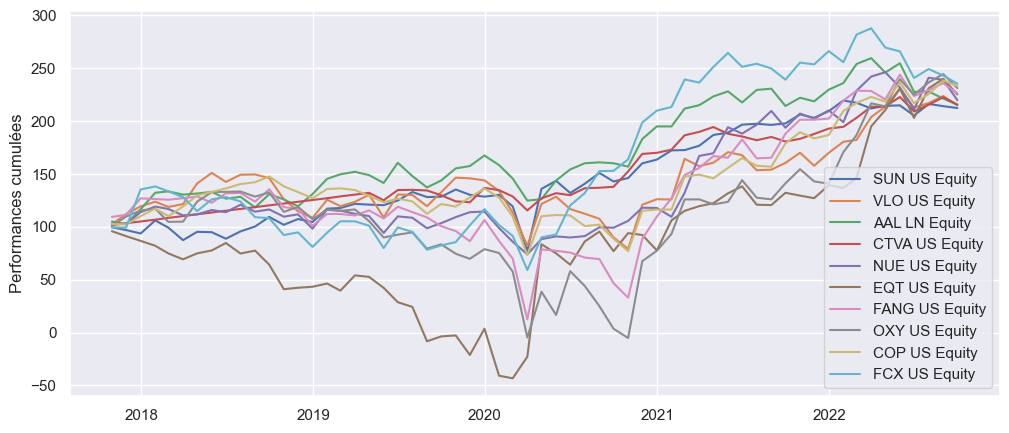

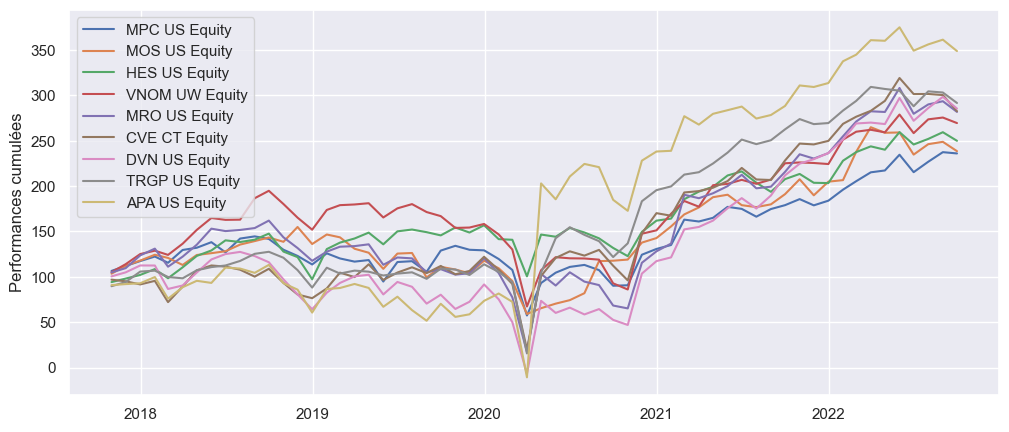

In [51]:
fig, ax = plt.subplots(figsize=(12, 5))
for i in range (0,10) :
    col = cumul_sums.columns[i]
    ax.plot(cumul_sums.index, cumul_sums[col],  label='{}'.format(col))
    ax.set_ylabel("Performances cumulées")
    ax.legend()
plt.savefig(f'perf_cumul/plot1.png')
plt.show()

fig, ax = plt.subplots(figsize=(12, 5))
for i in range (10,20) :
    col = cumul_sums.columns[i]
    plt.plot(cumul_sums.index, cumul_sums[col],  label='{}'.format(col))
    plt.ylabel("Performances cumulées")
    plt.legend()
plt.savefig(f'perf_cumul/plot2.png')
plt.show()

fig, ax = plt.subplots(figsize=(12, 5))
for i in range (30, 40) :
    col = cumul_sums.columns[i]
    plt.plot(cumul_sums.index, cumul_sums[col],  label='{}'.format(col))
    plt.ylabel("Performances cumulées")
    plt.legend()
plt.savefig(f'perf_cumul/plot3.png')
plt.show()

fig, ax = plt.subplots(figsize=(12, 5))
for i in range (40, 50) :
    col = cumul_sums.columns[i]
    plt.plot(cumul_sums.index, cumul_sums[col],  label='{}'.format(col))
    plt.ylabel("Performances cumulées")
    plt.legend()
plt.savefig(f'perf_cumul/plot4.png')
plt.show()

fig, ax = plt.subplots(figsize=(12, 5))
for i in range (50, 59) :
    col = cumul_sums.columns[i]
    plt.plot(cumul_sums.index, cumul_sums[col],  label='{}'.format(col))
    plt.ylabel("Performances cumulées")
    plt.legend()
plt.savefig(f'perf_cumul/plot5.png')
plt.show()


## Question 3

Représenter la matrice de corrélation entre les titres.

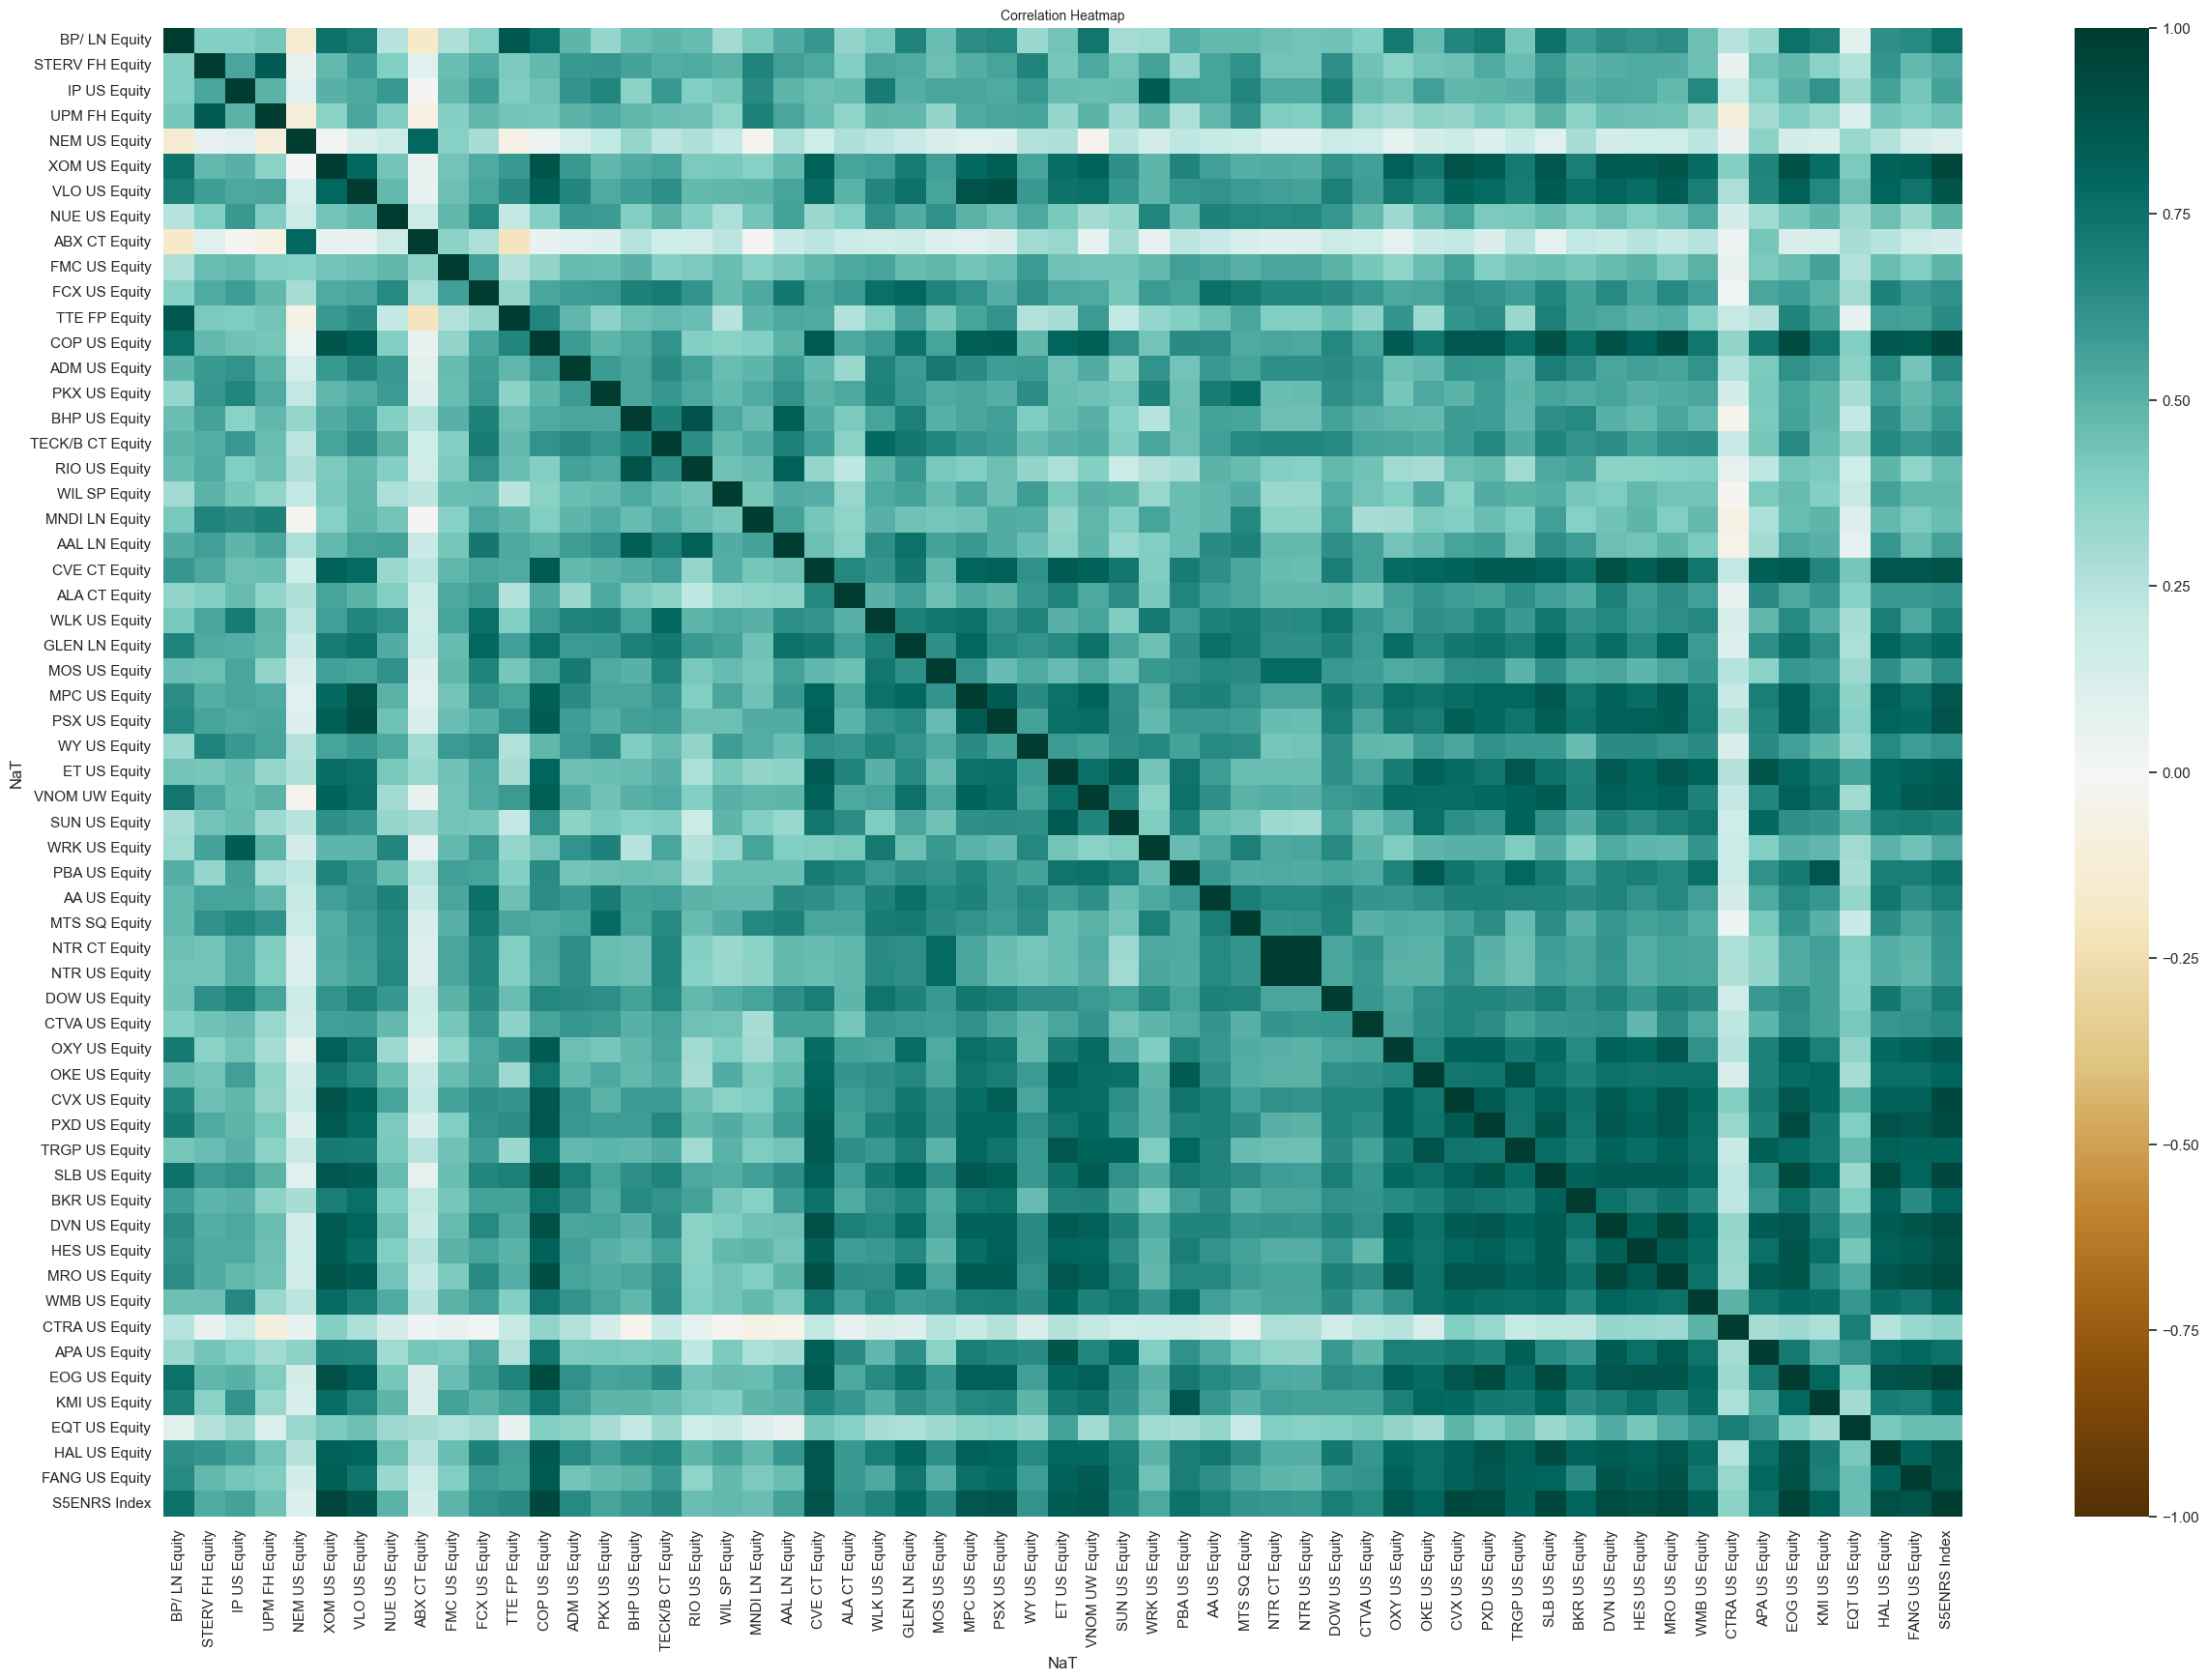

In [53]:
plt.figure(figsize=(30, 20))
pd.set_option('display.max_columns', None)

for i in returns.columns:
    returns[i] = returns[i].apply(lambda x: float(x))
corrs = returns.corr()

heatmap = sns.heatmap(corrs, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10});

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

## Question 4

Calculer quelques indicateurs synthétiques du risque : Sharpe, Treynor, VaR historique, VaR
Gaussienne, LPM Omega pour pour un niveau target égale à 0...

In [54]:
#créer un dataframe pour stocker les indicateurs
indicateurs = pd.DataFrame(columns = returns.columns, index = ['cov_stock_and_market', 'var_market','beta'])
cov_stock_market = []

for col in returns.columns: 
    cov_stock_market.append(returns["S5ENRS Index"].astype(float).cov(returns[col].astype(float)))

indicateurs.loc["cov_stock_and_market"] = cov_stock_market
indicateurs.loc["var_market"] =  np.var(returns["S5ENRS Index"])
indicateurs.loc["beta"] = indicateurs.loc["cov_stock_and_market"] / indicateurs.loc["var_market"]
indicateurs

NaT                  BP/ LN Equity STERV FH Equity IP US Equity UPM FH Equity  \
cov_stock_and_market     65.164648       52.480861    45.547418     35.024834   
var_market              109.886148      109.886148   109.886148    109.886148   
beta                       0.59302        0.477593     0.414496      0.318737   

NaT                  NEM US Equity XOM US Equity VLO US Equity NUE US Equity  \
cov_stock_and_market     10.554087      95.95231    133.443761     63.367905   
var_market              109.886148    109.886148    109.886148    109.886148   
beta                      0.096046      0.873198      1.214382      0.576669   

NaT                  ABX CT Equity FMC US Equity FCX US Equity TTE FP Equity  \
cov_stock_and_market     15.006488     35.537836     97.740669     59.333814   
var_market              109.886148    109.886148    109.886148    109.886148   
beta                      0.136564      0.323406      0.889472      0.539957   

NaT                  COP US Equity ADM US Equity PKX US Equity BHP US Equity  \
cov_stock_and_market     124.98004       45.9312     55.219372     50.880962   
var_market              109.886148    109.886148    109.886148    109.886148   
beta                      1.137359      0.417989      0.502514      0.463033   

NaT                  TECK/B CT Equity RIO US Equity WIL SP Equity  \
cov_stock_and_market        81.504291      36.62131     33.346837   
var_market                 109.886148    109.886148    109.886148   
beta                         0.741716      0.333266      0.303467   

NaT                  MNDI LN Equity AAL LN Equity CVE CT Equity ALA CT Equity  \
cov_stock_and_market      36.313502     61.812912     185.42716     68.888181   
var_market               109.886148    109.886148    109.886148    109.886148   
beta                       0.330465      0.562518      1.687448      0.626905   

NaT                  WLK US Equity GLEN LN Equity MOS US Equity MPC US Equity  \
cov_stock_and_market     73.460126       92.81288     88.589985    125.866663   
var_market              109.886148     109.886148    109.886148    109.886148   
beta                      0.668511       0.844628      0.806198      1.145428   

NaT                  PSX US Equity WY US Equity ET US Equity VNOM UW Equity  \
cov_stock_and_market    111.630168     67.88481   140.364724      154.13381   
var_market              109.886148   109.886148   109.886148     109.886148   
beta                      1.015871     0.617774     1.277365       1.402668   

NaT                  SUN US Equity WRK US Equity PBA US Equity AA US Equity  \
cov_stock_and_market     81.944917      52.13916     80.203625   139.887021   
var_market              109.886148    109.886148    109.886148   109.886148   
beta                      0.745726      0.474483      0.729879     1.273018   

NaT                  MTS SQ Equity NTR CT Equity NTR US Equity DOW US Equity  \
cov_stock_and_market     88.199991     52.920674     52.406128         66.07   
var_market              109.886148    109.886148    109.886148    109.886148   
beta                      0.802649      0.481595      0.476913      0.601259   

NaT                  CTVA US Equity OXY US Equity OKE US Equity CVX US Equity  \
cov_stock_and_market      40.702919    179.034634    115.035506     90.570126   
var_market               109.886148    109.886148    109.886148    109.886148   
beta                        0.37041      1.629274      1.046861      0.824218   

NaT                  PXD US Equity TRGP US Equity SLB US Equity BKR US Equity  \
cov_stock_and_market    119.830281     167.504739     140.88131     120.54508   
var_market              109.886148     109.886148    109.886148    109.886148   
beta                      1.090495       1.524348      1.282066         1.097   

NaT                  DVN US Equity HES US Equity MRO US Equity WMB US Equity  \
cov_stock_and_market    192.668079     130.03901    204.413109     83.281283   
var_market          

### Calcul du beta

On suppose que le taux sans risque vaut 0 (on sait qu'il est quasi nul).

In [55]:
pr = []

rendements_titres = returns.drop("S5ENRS Index", axis = 1)

for col in rendements_titres.T.columns: 
    pr.append(rendements_titres.T[col].sum())

rendements_pf = pd.DataFrame(pr, rendements_titres.T.columns, columns =["portfolio returns"]) 
rendements_pf.head()

portfolio returns
Dates                        
2017-10-31          34.608721
2017-11-30          73.563544
2017-12-31         371.862340
2018-01-31         244.736643
2018-02-28        -433.216076

In [56]:
# on somme le beta de chaque titre sans comptabiliser celui de S&P 500 Energy Index. 
beta_pf = indicateurs.drop("S5ENRS Index", axis = 1).loc["beta"].sum()
beta_pf

49.94930252455194

### Treynor ratio

In [57]:
Treynor_ratio = rendements_pf / beta_pf
Treynor_ratio = Treynor_ratio.rename(columns = {"portfolio returns" : "Treynor ratio"})
Treynor_ratio.head()

Treynor ratio
Dates                    
2017-10-31       0.692877
2017-11-30       1.472764
2017-12-31       7.444795
2018-01-31       4.899701
2018-02-28      -8.673116

### Sharpe Ratio = (portfolio return - risk free rate) / standard deviation of the portfolio's return

In [58]:
sharpe_ratio = rendements_pf / np.std(rendements_pf)
sharpe_ratio.rename(columns = {"portfolio returns" : "Sharpe ratios"})
sharpe_ratio.head()

portfolio returns
Dates                        
2017-10-31           0.064144
2017-11-30           0.136343
2017-12-31           0.689210
2018-01-31           0.453595
2018-02-28          -0.802923

### Value at risk  (VaR) historique

In [59]:
rendements_pf_sorted = rendements_pf.sort_values(by = ["portfolio returns"])
rendements_pf_sorted.head()

portfolio returns
Dates                        
2020-03-31       -1810.163542
2022-06-30       -1050.300016
2019-05-31        -653.942678
2020-02-29        -644.594323
2018-10-31        -626.233644

### VaR Gaussienne

In [61]:
z = -1.65
moyenne = rendements_pf["portfolio returns"].mean()
ecart_type = rendements_pf["portfolio returns"].std()
VaR_gaussienne = moyenne + (z * ecart_type)
VaR_gaussienne #perte maximale attendue, qui ne sera pas dépassée avec le niveau de confiance spécifié

-817.9152200824013

### LPM Omega

Lower partial moment (LPM) définit le montant que le portefeuille perdrait en cas de rendements négatifs.
LPM est calculé en multipliyant la probabilité d'un rendement négatif par le rendement : c'est l'espérance de rendements négatifs sachant que le rendement est négatif.


LPM d'un portefeuille en rapport à Oméga (LPM-Oméga) est une mesure statistique qui quantifie le risque de queue d'un portefeuille en tenant compte de la volatilité et de la corrélation des actifs dans le portefeuille. Oméga est une mesure de la performance ajustée au risque d'un portefeuille qui ressemble au ratio Sharpe, mais qui prend également en compte la skewness et la kurtosis des rendements.

Pour calculer LPM-Oméga, on doit d'abord calculer l'Oméga d'un portefeuille. 

Ensuite, LPM-Oméga est calculé en multipliant l'Oméga par la probabilité de rendement négatif. 

Pour calculer l'Omega d'un portefeuille, vous devez d'abord estimer les paramètres suivants:

    Le rendement attendu (E(R)) du portefeuille
    La volatilité (σ) du rendement du portefeuille
    La skewness (S) du rendement du portefeuille
    La kurtosis (K) du rendement du portefeuille


$\Omega = (E(R) - R_f) / ( \sigma * \sqrt(1-S^2 - \frac{(3-K)}{4})$

où $R_f$ est le taux d'intérêt sans risque, qui est généralement défini comme étant le taux d'intérêt sur les bons du Trésor à court terme. La skewness mesure l'asymétrie de la distribution des rendements, tandis que la kurtosis mesure l'aplatissement de la distribution.

(L'Omega est une mesure relative qui permet de comparer les portefeuilles entre eux, mais il n'a pas de sens absolu.)

In [64]:
skewness = skew(rendements_pf)
kurt = kurtosis(rendements_pf)
omega2 = moyenne / (ecart_type * np.sqrt(1-skewness**2-(3-kurt)/4))
print(omega2)

proba_rendement_negatif = len(rendements_negatifs_esperes)/len(rendements_pf)

lpm_omega = omega2 * proba_rendement_negatif
print(lpm_omega)

[0.13969619]
[0.00232827]
